In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_10degree.csv',header=None)

In [5]:
x_10degree = x_csv.to_numpy(dtype='float32')

In [6]:
x = x_10degree[:, 0:15]

In [7]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [8]:
y_10degree = pd.read_csv('y_output(10deg).csv',header=None)

In [9]:
os.chdir('C:\\Users\\User')

In [10]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [11]:
y = y_10degree.reshape(((36*3+1)*6, 100, 100))

In [12]:
tsr = x_10degree[:, -2]

In [13]:
theta = x_10degree[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(588, 100, 100)


In [16]:
print(y_test.shape)

(66, 100, 100)


In [17]:
print(x_train.shape)

(588, 15, 1)


In [18]:
print(x_test.shape)

(66, 15, 1)


In [19]:
theta_train.shape

(588,)

In [20]:
tsr_train.shape

(588,)

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_time = tf.keras.Input(shape=(2))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=64, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=64, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=64, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [23]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [24]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train.reshape((-1,1))))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test.reshape((-1,1))))

In [26]:
tsr_theta_train.shape

(588, 2)

In [27]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
15/15 [==============================] - 1s 4ms/step - loss: 93.2563 - rmse: 9.6569
Epoch 2/10000
15/15 [==============================] - 0s 3ms/step - loss: 8.1346 - rmse: 2.8521
Epoch 3/10000
15/15 [==============================] - 0s 4ms/step - loss: 1.6935 - rmse: 1.3013
Epoch 4/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.3559 - rmse: 0.5965
Epoch 5/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0938 - rmse: 0.3062
Epoch 6/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0393 - rmse: 0.1979
Epoch 7/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0241 - rmse: 0.1550
Epoch 8/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0215 - rmse: 0.1464
Epoch 9/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1460
Epoch 10/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0213 - rmse: 0.1457
Epoch 11/10000
15/15 [======

15/15 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1488
Epoch 85/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1458
Epoch 86/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0228 - rmse: 0.1505
Epoch 87/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - rmse: 0.1539
Epoch 88/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1581
Epoch 89/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1580
Epoch 90/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0252 - rmse: 0.1584
Epoch 91/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - rmse: 0.1538
Epoch 92/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1519
Epoch 93/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0231 - rmse: 0.1518
Epoch 94/10000
15/15 [=============

15/15 [==============================] - 0s 4ms/step - loss: 0.0323 - rmse: 0.1794
Epoch 168/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0272 - rmse: 0.1646
Epoch 169/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0348 - rmse: 0.1863
Epoch 170/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1565
Epoch 171/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1538
Epoch 172/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0324 - rmse: 0.1798
Epoch 173/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0275 - rmse: 0.1658
Epoch 174/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0269 - rmse: 0.1637
Epoch 175/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0271 - rmse: 0.1644
Epoch 176/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0254 - rmse: 0.1592
Epoch 177/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0299 - rmse: 0.1726
Epoch 250/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0277 - rmse: 0.1661
Epoch 251/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0364 - rmse: 0.1906
Epoch 252/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0524 - rmse: 0.2287
Epoch 253/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0640 - rmse: 0.2529
Epoch 254/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0314 - rmse: 0.1770
Epoch 255/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0264 - rmse: 0.1623
Epoch 256/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0286 - rmse: 0.1688
Epoch 257/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0278 - rmse: 0.1666
Epoch 258/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0273 - rmse: 0.1650
Epoch 259/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.1606 - rmse: 0.4006
Epoch 332/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0663 - rmse: 0.2574
Epoch 333/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0550 - rmse: 0.2344
Epoch 334/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0535 - rmse: 0.2312
Epoch 335/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0384 - rmse: 0.1958
Epoch 336/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0420 - rmse: 0.2048
Epoch 337/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0722 - rmse: 0.2685
Epoch 338/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0665 - rmse: 0.2579
Epoch 339/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0505 - rmse: 0.2246
Epoch 340/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0560 - rmse: 0.2365
Epoch 341/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0751 - rmse: 0.2739
Epoch 414/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0762 - rmse: 0.2759
Epoch 415/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0622 - rmse: 0.2493
Epoch 416/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0435 - rmse: 0.2085
Epoch 417/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0336 - rmse: 0.1833
Epoch 418/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0374 - rmse: 0.1933
Epoch 419/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0299 - rmse: 0.1729
Epoch 420/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0309 - rmse: 0.1757
Epoch 421/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0337 - rmse: 0.1834
Epoch 422/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0342 - rmse: 0.1849
Epoch 423/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0365 - rmse: 0.1909
Epoch 496/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0317 - rmse: 0.1780
Epoch 497/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0285 - rmse: 0.1688
Epoch 498/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0321 - rmse: 0.1791
Epoch 499/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0438 - rmse: 0.2092
Epoch 500/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0385 - rmse: 0.1962
Epoch 501/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0529 - rmse: 0.2299
Epoch 502/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0414 - rmse: 0.2033
Epoch 503/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0521 - rmse: 0.2281
Epoch 504/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.1039 - rmse: 0.3223
Epoch 505/10000
15/15 [===

15/15 [==============================] - 0s 5ms/step - loss: 0.0290 - rmse: 0.1700
Epoch 578/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0283 - rmse: 0.1680
Epoch 579/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0275 - rmse: 0.1656
Epoch 580/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0460 - rmse: 0.2143
Epoch 581/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0635 - rmse: 0.2519
Epoch 582/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0366 - rmse: 0.1912
Epoch 583/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0295 - rmse: 0.1715
Epoch 584/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0333 - rmse: 0.1824
Epoch 585/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0329 - rmse: 0.1813
Epoch 586/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0342 - rmse: 0.1847
Epoch 587/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0356 - rmse: 0.1885
Epoch 660/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0263 - rmse: 0.1620
Epoch 661/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0275 - rmse: 0.1657
Epoch 662/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0295 - rmse: 0.1715
Epoch 663/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0333 - rmse: 0.1823
Epoch 664/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0301 - rmse: 0.1733
Epoch 665/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0386 - rmse: 0.1963
Epoch 666/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0372 - rmse: 0.1928
Epoch 667/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0297 - rmse: 0.1723
Epoch 668/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0305 - rmse: 0.1744
Epoch 669/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0494 - rmse: 0.2222
Epoch 742/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0377 - rmse: 0.1942
Epoch 743/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0343 - rmse: 0.1850
Epoch 744/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0279 - rmse: 0.1669
Epoch 745/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0287 - rmse: 0.1691
Epoch 746/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0280 - rmse: 0.1671
Epoch 747/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0244 - rmse: 0.1562
Epoch 748/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0260 - rmse: 0.1611
Epoch 749/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0310 - rmse: 0.1760
Epoch 750/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0302 - rmse: 0.1737
Epoch 751/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0297 - rmse: 0.1723
Epoch 824/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0258 - rmse: 0.1605
Epoch 825/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0266 - rmse: 0.1629
Epoch 826/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0316 - rmse: 0.1778
Epoch 827/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0303 - rmse: 0.1740
Epoch 828/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0322 - rmse: 0.1793
Epoch 829/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0245 - rmse: 0.1565
Epoch 830/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0266 - rmse: 0.1630
Epoch 831/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0306 - rmse: 0.1749
Epoch 832/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0263 - rmse: 0.1620
Epoch 833/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0357 - rmse: 0.1889
Epoch 906/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0284 - rmse: 0.1683
Epoch 907/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0262 - rmse: 0.1617
Epoch 908/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 909/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0256 - rmse: 0.1599
Epoch 910/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0309 - rmse: 0.1755
Epoch 911/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0363 - rmse: 0.1905
Epoch 912/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0364 - rmse: 0.1907
Epoch 913/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0387 - rmse: 0.1967
Epoch 914/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0356 - rmse: 0.1886
Epoch 915/10000
15/15 [===

15/15 [==============================] - 0s 3ms/step - loss: 0.0285 - rmse: 0.1687
Epoch 988/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0281 - rmse: 0.1674
Epoch 989/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0304 - rmse: 0.1742
Epoch 990/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0270 - rmse: 0.1643
Epoch 991/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0280 - rmse: 0.1671
Epoch 992/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0339 - rmse: 0.1841
Epoch 993/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0322 - rmse: 0.1793
Epoch 994/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0261 - rmse: 0.1615
Epoch 995/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1539
Epoch 996/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0275 - rmse: 0.1656
Epoch 997/10000
15/15 [===

15/15 [==============================] - 0s 4ms/step - loss: 0.0230 - rmse: 0.1514
Epoch 1070/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1567
Epoch 1071/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 1072/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1558
Epoch 1073/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1561
Epoch 1074/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 1075/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1677
Epoch 1076/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0281 - rmse: 0.1675
Epoch 1077/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0257 - rmse: 0.1602
Epoch 1078/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0230 - rmse: 0.1515
Epoch 1079/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0296 - rmse: 0.1719
Epoch 1152/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1619
Epoch 1153/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1561
Epoch 1154/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.1571
Epoch 1155/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0292 - rmse: 0.1709
Epoch 1156/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0238 - rmse: 0.1543
Epoch 1157/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0230 - rmse: 0.1516
Epoch 1158/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0294 - rmse: 0.1714
Epoch 1159/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0230 - rmse: 0.1516
Epoch 1160/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1580
Epoch 1161/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 1234/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0255 - rmse: 0.1596
Epoch 1235/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0342 - rmse: 0.1849
Epoch 1236/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0264 - rmse: 0.1625
Epoch 1237/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0283 - rmse: 0.1682
Epoch 1238/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1538
Epoch 1239/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 1240/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1580
Epoch 1241/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 1242/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0246 - rmse: 0.1567
Epoch 1243/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0255 - rmse: 0.1597
Epoch 1316/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0260 - rmse: 0.1610
Epoch 1317/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 1318/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1457
Epoch 1319/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1472
Epoch 1320/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0234 - rmse: 0.1530
Epoch 1321/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0285 - rmse: 0.1686
Epoch 1322/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0276 - rmse: 0.1659
Epoch 1323/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0266 - rmse: 0.1629
Epoch 1324/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0305 - rmse: 0.1744
Epoch 1325/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0209 - rmse: 0.1443
Epoch 1398/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0237 - rmse: 0.1537
Epoch 1399/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0218 - rmse: 0.1477
Epoch 1400/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0241 - rmse: 0.1550
Epoch 1401/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.1570
Epoch 1402/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0224 - rmse: 0.1496
Epoch 1403/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0212 - rmse: 0.1453
Epoch 1404/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 1405/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 1406/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0265 - rmse: 0.1626
Epoch 1407/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0237 - rmse: 0.1540
Epoch 1480/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1441
Epoch 1481/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1490
Epoch 1482/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1482
Epoch 1483/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1498
Epoch 1484/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1460
Epoch 1485/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0223 - rmse: 0.1492
Epoch 1486/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1490
Epoch 1487/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1472
Epoch 1488/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1501
Epoch 1489/10000


15/15 [==============================] - 0s 6ms/step - loss: 0.0206 - rmse: 0.1433
Epoch 1562/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0219 - rmse: 0.1478
Epoch 1563/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0218 - rmse: 0.1475
Epoch 1564/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0211 - rmse: 0.1452
Epoch 1565/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 1566/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0227 - rmse: 0.1506
Epoch 1567/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0219 - rmse: 0.1478
Epoch 1568/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1461
Epoch 1569/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1470
Epoch 1570/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0243 - rmse: 0.1558
Epoch 1571/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0221 - rmse: 0.1485
Epoch 1644/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0210 - rmse: 0.1448
Epoch 1645/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0199 - rmse: 0.1410
Epoch 1646/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 1647/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1458
Epoch 1648/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1404
Epoch 1649/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1432
Epoch 1650/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1433
Epoch 1651/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1410
Epoch 1652/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 1653/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1410
Epoch 1726/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1397
Epoch 1727/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1397
Epoch 1728/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1423
Epoch 1729/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1456
Epoch 1730/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 1731/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0214 - rmse: 0.1460
Epoch 1732/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 1733/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1433
Epoch 1734/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1438
Epoch 1735/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 1808/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1418
Epoch 1809/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 1810/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0203 - rmse: 0.1422
Epoch 1811/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0204 - rmse: 0.1428
Epoch 1812/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 1813/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.1418
Epoch 1814/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 1815/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1412
Epoch 1816/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 1817/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0192 - rmse: 0.1384
Epoch 1890/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0190 - rmse: 0.1377
Epoch 1891/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1391
Epoch 1892/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1392
Epoch 1893/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1399
Epoch 1894/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0193 - rmse: 0.1388
Epoch 1895/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 1896/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1371
Epoch 1897/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 1898/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 1899/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0195 - rmse: 0.1394
Epoch 1972/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0192 - rmse: 0.1383
Epoch 1973/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1372
Epoch 1974/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 1975/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 1976/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 1977/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 1978/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 1979/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 1980/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 1981/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0183 - rmse: 0.1351
Epoch 2054/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0183 - rmse: 0.1350
Epoch 2055/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0182 - rmse: 0.1346
Epoch 2056/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 2057/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 2058/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 2059/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0183 - rmse: 0.1349
Epoch 2060/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0184 - rmse: 0.1353
Epoch 2061/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 2062/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 2063/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 2136/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 2137/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1338
Epoch 2138/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0181 - rmse: 0.1343
Epoch 2139/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2140/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2141/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 2142/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 2143/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1347
Epoch 2144/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1339
Epoch 2145/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1331
Epoch 2218/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0182 - rmse: 0.1346
Epoch 2219/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 2220/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 2221/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1339
Epoch 2222/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 2223/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 2224/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 2225/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 2226/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2227/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 2300/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1331
Epoch 2301/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 2302/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2303/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 2304/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 2305/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2306/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 2307/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 2308/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 2309/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 2382/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0179 - rmse: 0.1335
Epoch 2383/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1331
Epoch 2384/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1328
Epoch 2385/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1328
Epoch 2386/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 2387/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 2388/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 2389/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 2390/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 2391/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0180 - rmse: 0.1341
Epoch 2464/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0180 - rmse: 0.1340
Epoch 2465/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 2466/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1330
Epoch 2467/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 2468/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 2469/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 2470/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1328
Epoch 2471/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 2472/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1331
Epoch 2473/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2546/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 2547/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1325
Epoch 2548/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2549/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2550/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2551/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 2552/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2553/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0177 - rmse: 0.1328
Epoch 2554/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 2555/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 2628/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 2629/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 2630/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2631/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1331
Epoch 2632/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 2633/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0177 - rmse: 0.1329
Epoch 2634/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 2635/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 2636/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1320
Epoch 2637/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 2710/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 2711/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1318
Epoch 2712/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 2713/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2714/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 2715/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 2716/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0175 - rmse: 0.1320
Epoch 2717/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 2718/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1316
Epoch 2719/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 2792/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 2793/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 2794/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 2795/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2796/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 2797/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 2798/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 2799/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0178 - rmse: 0.1333
Epoch 2800/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0174 - rmse: 0.1316
Epoch 2801/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1313
Epoch 2874/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 2875/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 2876/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 2877/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 2878/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1309
Epoch 2879/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1327
Epoch 2880/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0176 - rmse: 0.1324
Epoch 2881/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1321
Epoch 2882/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 2883/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1313
Epoch 2956/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1313
Epoch 2957/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 2958/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 2959/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 2960/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1309
Epoch 2961/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 2962/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0179 - rmse: 0.1337
Epoch 2963/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1312
Epoch 2964/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1317
Epoch 2965/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 3038/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 3039/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 3040/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1302
Epoch 3041/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0173 - rmse: 0.1314
Epoch 3042/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0172 - rmse: 0.1309
Epoch 3043/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1316
Epoch 3044/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 3045/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0174 - rmse: 0.1316
Epoch 3046/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 3047/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1313
Epoch 3120/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0173 - rmse: 0.1313
Epoch 3121/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 3122/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 3123/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 3124/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 3125/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1309
Epoch 3126/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0171 - rmse: 0.1305
Epoch 3127/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 3128/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 3129/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 3202/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 3203/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1308
Epoch 3204/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 3205/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1301
Epoch 3206/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 3207/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 3208/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 3209/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1308
Epoch 3210/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 3211/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 3284/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 3285/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 3286/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 3287/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 3288/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 3289/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1297
Epoch 3290/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1301
Epoch 3291/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 3292/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1303
Epoch 3293/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1290
Epoch 3366/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 3367/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 3368/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 3369/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 3370/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1289
Epoch 3371/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 3372/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 3373/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 3374/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1290
Epoch 3375/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 3448/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 3449/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 3450/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 3451/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 3452/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1298
Epoch 3453/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 3454/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 3455/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 3456/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 3457/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1286
Epoch 3530/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1298
Epoch 3531/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 3532/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1289
Epoch 3533/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 3534/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1286
Epoch 3535/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 3536/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1297
Epoch 3537/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 3538/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1286
Epoch 3539/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 3612/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 3613/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 3614/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 3615/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0167 - rmse: 0.1290
Epoch 3616/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0169 - rmse: 0.1299
Epoch 3617/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 3618/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 3619/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 3620/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1286
Epoch 3621/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 3694/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 3695/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 3696/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 3697/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 3698/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 3699/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0165 - rmse: 0.1283
Epoch 3700/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 3701/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1287
Epoch 3702/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1286
Epoch 3703/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 3776/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 3777/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 3778/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 3779/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1274
Epoch 3780/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 3781/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1286
Epoch 3782/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 3783/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 3784/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1285
Epoch 3785/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 3858/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 3859/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 3860/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 3861/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0163 - rmse: 0.1274
Epoch 3862/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 3863/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1274
Epoch 3864/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 3865/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 3866/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 3867/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1270
Epoch 3940/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 3941/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 3942/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1286
Epoch 3943/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1281
Epoch 3944/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 3945/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 3946/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 3947/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 3948/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 3949/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 4022/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0169 - rmse: 0.1300
Epoch 4023/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1278
Epoch 4024/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 4025/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1279
Epoch 4026/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 4027/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 4028/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 4029/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 4030/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1270
Epoch 4031/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 4104/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 4105/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1280
Epoch 4106/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1284
Epoch 4107/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1278
Epoch 4108/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 4109/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 4110/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1266
Epoch 4111/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0164 - rmse: 0.1278
Epoch 4112/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 4113/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 4186/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 4187/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1290
Epoch 4188/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1275
Epoch 4189/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 4190/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0165 - rmse: 0.1282
Epoch 4191/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 4192/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 4193/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 4194/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1272
Epoch 4195/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 4268/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1258
Epoch 4269/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 4270/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 4271/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 4272/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1277
Epoch 4273/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 4274/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1266
Epoch 4275/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1265
Epoch 4276/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 4277/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1276
Epoch 4350/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1263
Epoch 4351/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 4352/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 4353/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 4354/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 4355/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1271
Epoch 4356/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 4357/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0162 - rmse: 0.1273
Epoch 4358/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 4359/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1250
Epoch 4432/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 4433/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 4434/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 4435/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 4436/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 4437/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 4438/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 4439/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 4440/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 4441/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 4514/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1260
Epoch 4515/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 4516/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 4517/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 4518/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 4519/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 4520/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 4521/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 4522/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1261
Epoch 4523/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.1259
Epoch 4596/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 4597/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 4598/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1244
Epoch 4599/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 4600/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 4601/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1249
Epoch 4602/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1246
Epoch 4603/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1241
Epoch 4604/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 4605/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1242
Epoch 4678/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 4679/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 4680/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 4681/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 4682/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0163 - rmse: 0.1278
Epoch 4683/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 4684/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1248
Epoch 4685/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 4686/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1239
Epoch 4687/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1243
Epoch 4760/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1241
Epoch 4761/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1238
Epoch 4762/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1237
Epoch 4763/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 4764/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 4765/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 4766/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1231
Epoch 4767/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 4768/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 4769/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1251
Epoch 4842/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1241
Epoch 4843/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1229
Epoch 4844/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 4845/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 4846/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 4847/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1254
Epoch 4848/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1231
Epoch 4849/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1238
Epoch 4850/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 4851/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1250
Epoch 4924/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 4925/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1238
Epoch 4926/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 4927/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1241
Epoch 4928/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1235
Epoch 4929/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 4930/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1237
Epoch 4931/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1234
Epoch 4932/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1224
Epoch 4933/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1235
Epoch 5006/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 5007/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1238
Epoch 5008/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1228
Epoch 5009/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1224
Epoch 5010/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 5011/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1231
Epoch 5012/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1226
Epoch 5013/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1223
Epoch 5014/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 5015/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1224
Epoch 5088/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 5089/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 5090/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 5091/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1219
Epoch 5092/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 5093/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1235
Epoch 5094/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 5095/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1218
Epoch 5096/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1222
Epoch 5097/10000


15/15 [==============================] - 0s 6ms/step - loss: 0.0149 - rmse: 0.1219
Epoch 5170/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0148 - rmse: 0.1217
Epoch 5171/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 5172/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1214
Epoch 5173/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1222
Epoch 5174/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 5175/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1229
Epoch 5176/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0149 - rmse: 0.1221
Epoch 5177/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1238
Epoch 5178/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 5179/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1216
Epoch 5252/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 5253/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1212
Epoch 5254/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1210
Epoch 5255/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 5256/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 5257/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 5258/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5259/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1218
Epoch 5260/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1213
Epoch 5261/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 5334/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1204
Epoch 5335/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1203
Epoch 5336/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1202
Epoch 5337/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1202
Epoch 5338/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 5339/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1214
Epoch 5340/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 5341/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1212
Epoch 5342/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5343/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 5416/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 5417/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1202
Epoch 5418/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 5419/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1216
Epoch 5420/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1212
Epoch 5421/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1205
Epoch 5422/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1219
Epoch 5423/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0148 - rmse: 0.1215
Epoch 5424/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0147 - rmse: 0.1210
Epoch 5425/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1193
Epoch 5498/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 5499/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 5500/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5501/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1201
Epoch 5502/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 5503/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1211
Epoch 5504/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 5505/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 5506/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1193
Epoch 5507/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1210
Epoch 5580/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0154 - rmse: 0.1240
Epoch 5581/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0147 - rmse: 0.1210
Epoch 5582/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1189
Epoch 5583/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 5584/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1205
Epoch 5585/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 5586/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1191
Epoch 5587/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1197
Epoch 5588/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1189
Epoch 5589/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1189
Epoch 5662/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 5663/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1199
Epoch 5664/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1200
Epoch 5665/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1200
Epoch 5666/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5667/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 5668/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 5669/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1193
Epoch 5670/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1191
Epoch 5671/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0142 - rmse: 0.1190
Epoch 5744/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 5745/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1192
Epoch 5746/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0143 - rmse: 0.1197
Epoch 5747/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0139 - rmse: 0.1179
Epoch 5748/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 5749/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 5750/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5751/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 5752/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0142 - rmse: 0.1190
Epoch 5753/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1177
Epoch 5826/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1174
Epoch 5827/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 5828/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1177
Epoch 5829/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1176
Epoch 5830/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1175
Epoch 5831/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 5832/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0149 - rmse: 0.1220
Epoch 5833/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 5834/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1189
Epoch 5835/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1202
Epoch 5908/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1181
Epoch 5909/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1198
Epoch 5910/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 5911/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 5912/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 5913/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0142 - rmse: 0.1189
Epoch 5914/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0139 - rmse: 0.1176
Epoch 5915/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1174
Epoch 5916/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 5917/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1185
Epoch 5990/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1168
Epoch 5991/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1169
Epoch 5992/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 5993/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1197
Epoch 5994/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1204
Epoch 5995/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0138 - rmse: 0.1172
Epoch 5996/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0137 - rmse: 0.1169
Epoch 5997/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 5998/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0137 - rmse: 0.1172
Epoch 5999/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1164
Epoch 6072/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 6073/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1159
Epoch 6074/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1170
Epoch 6075/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0134 - rmse: 0.1157
Epoch 6076/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0135 - rmse: 0.1159
Epoch 6077/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1162
Epoch 6078/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1170
Epoch 6079/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 6080/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1181
Epoch 6081/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0139 - rmse: 0.1177
Epoch 6154/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0141 - rmse: 0.1185
Epoch 6155/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0135 - rmse: 0.1160
Epoch 6156/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 6157/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 6158/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0133 - rmse: 0.1151
Epoch 6159/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0134 - rmse: 0.1155
Epoch 6160/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0137 - rmse: 0.1171
Epoch 6161/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1175
Epoch 6162/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0138 - rmse: 0.1172
Epoch 6163/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 6236/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 6237/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0135 - rmse: 0.1161
Epoch 6238/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 6239/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 6240/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1206
Epoch 6241/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 6242/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1168
Epoch 6243/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 6244/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 6245/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1153
Epoch 6318/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1148
Epoch 6319/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0136 - rmse: 0.1164
Epoch 6320/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1154
Epoch 6321/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 6322/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0131 - rmse: 0.1145
Epoch 6323/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 6324/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0134 - rmse: 0.1157
Epoch 6325/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0132 - rmse: 0.1148
Epoch 6326/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0131 - rmse: 0.1145
Epoch 6327/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1140
Epoch 6400/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1140
Epoch 6401/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1148
Epoch 6402/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 6403/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1133
Epoch 6404/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 6405/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 6406/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1139
Epoch 6407/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1141
Epoch 6408/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1143
Epoch 6409/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 6482/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0133 - rmse: 0.1154
Epoch 6483/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0134 - rmse: 0.1158
Epoch 6484/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0136 - rmse: 0.1164
Epoch 6485/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 6486/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 6487/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0132 - rmse: 0.1150
Epoch 6488/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0135 - rmse: 0.1159
Epoch 6489/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 6490/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0134 - rmse: 0.1159
Epoch 6491/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 6564/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1120
Epoch 6565/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0135 - rmse: 0.1161
Epoch 6566/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1146
Epoch 6567/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1145
Epoch 6568/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 6569/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1156
Epoch 6570/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1139
Epoch 6571/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1142
Epoch 6572/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 6573/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1114
Epoch 6646/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0131 - rmse: 0.1144
Epoch 6647/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1186
Epoch 6648/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0136 - rmse: 0.1164
Epoch 6649/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1132
Epoch 6650/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0128 - rmse: 0.1130
Epoch 6651/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1124
Epoch 6652/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0131 - rmse: 0.1142
Epoch 6653/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0129 - rmse: 0.1136
Epoch 6654/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1125
Epoch 6655/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1154
Epoch 6728/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1152
Epoch 6729/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1143
Epoch 6730/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1124
Epoch 6731/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1111
Epoch 6732/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 6733/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1106
Epoch 6734/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 6735/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1151
Epoch 6736/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1124
Epoch 6737/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 6810/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 6811/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1119
Epoch 6812/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1125
Epoch 6813/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6814/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1126
Epoch 6815/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1128
Epoch 6816/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1126
Epoch 6817/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 6818/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 6819/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1180
Epoch 6892/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0137 - rmse: 0.1168
Epoch 6893/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1130
Epoch 6894/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1115
Epoch 6895/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.1110
Epoch 6896/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0123 - rmse: 0.1107
Epoch 6897/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 6898/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 6899/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 6900/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 6901/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6974/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 6975/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 6976/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0133 - rmse: 0.1152
Epoch 6977/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0130 - rmse: 0.1138
Epoch 6978/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 6979/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1113
Epoch 6980/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0123 - rmse: 0.1107
Epoch 6981/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1140
Epoch 6982/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1120
Epoch 6983/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1131
Epoch 7056/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1121
Epoch 7057/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1123
Epoch 7058/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0131 - rmse: 0.1145
Epoch 7059/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 7060/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 7061/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0134 - rmse: 0.1157
Epoch 7062/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1120
Epoch 7063/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1133
Epoch 7064/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0137 - rmse: 0.1169
Epoch 7065/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 7138/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1095
Epoch 7139/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1092
Epoch 7140/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 7141/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0129 - rmse: 0.1137
Epoch 7142/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0126 - rmse: 0.1124
Epoch 7143/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 7144/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0121 - rmse: 0.1099
Epoch 7145/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1119
Epoch 7146/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0119 - rmse: 0.1089
Epoch 7147/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1068
Epoch 7220/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - rmse: 0.1087
Epoch 7221/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 7222/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1075
Epoch 7223/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1080
Epoch 7224/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1086
Epoch 7225/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1069
Epoch 7226/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1072
Epoch 7227/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 7228/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0126 - rmse: 0.1122
Epoch 7229/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1086
Epoch 7302/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1118
Epoch 7303/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 7304/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - rmse: 0.1085
Epoch 7305/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1074
Epoch 7306/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0115 - rmse: 0.1070
Epoch 7307/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0120 - rmse: 0.1093
Epoch 7308/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1085
Epoch 7309/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1080
Epoch 7310/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1079
Epoch 7311/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1052
Epoch 7384/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1054
Epoch 7385/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0114 - rmse: 0.1065
Epoch 7386/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1101
Epoch 7387/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.1073
Epoch 7388/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1125
Epoch 7389/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1139
Epoch 7390/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0125 - rmse: 0.1115
Epoch 7391/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1065
Epoch 7392/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1067
Epoch 7393/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 7466/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1083
Epoch 7467/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0119 - rmse: 0.1092
Epoch 7468/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1065
Epoch 7469/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 7470/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1065
Epoch 7471/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1058
Epoch 7472/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0114 - rmse: 0.1066
Epoch 7473/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1059
Epoch 7474/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1064
Epoch 7475/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1133
Epoch 7548/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1057
Epoch 7549/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1038
Epoch 7550/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1041
Epoch 7551/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 7552/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 7553/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1095
Epoch 7554/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 7555/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 7556/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1056
Epoch 7557/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.1072
Epoch 7630/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0114 - rmse: 0.1066
Epoch 7631/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - rmse: 0.1088
Epoch 7632/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 7633/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.1031
Epoch 7634/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1060
Epoch 7635/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0118 - rmse: 0.1084
Epoch 7636/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 7637/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 7638/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0108 - rmse: 0.1037
Epoch 7639/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1038
Epoch 7712/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 7713/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1021
Epoch 7714/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0118 - rmse: 0.1085
Epoch 7715/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 7716/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 7717/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1025
Epoch 7718/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1029
Epoch 7719/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1058
Epoch 7720/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1042
Epoch 7721/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0108 - rmse: 0.1038
Epoch 7794/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 7795/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0116 - rmse: 0.1076
Epoch 7796/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0113 - rmse: 0.1060
Epoch 7797/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 7798/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0106 - rmse: 0.1031
Epoch 7799/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0106 - rmse: 0.1031
Epoch 7800/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0106 - rmse: 0.1030
Epoch 7801/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0116 - rmse: 0.1078
Epoch 7802/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 7803/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1038
Epoch 7876/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 7877/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1091
Epoch 7878/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 7879/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 7880/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1018
Epoch 7881/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0111 - rmse: 0.1055
Epoch 7882/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0115 - rmse: 0.1072
Epoch 7883/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1034
Epoch 7884/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.1016
Epoch 7885/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0101 - rmse: 0.1003
Epoch 7958/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 7959/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0115 - rmse: 0.1071
Epoch 7960/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 7961/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0997
Epoch 7962/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 7963/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0126 - rmse: 0.1122
Epoch 7964/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0120 - rmse: 0.1097
Epoch 7965/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0105 - rmse: 0.1022
Epoch 7966/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 7967/10000


15/15 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.1003
Epoch 8040/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.1029
Epoch 8041/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 8042/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1003
Epoch 8043/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1014
Epoch 8044/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1034
Epoch 8045/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.1009
Epoch 8046/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1043
Epoch 8047/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 8048/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 8049/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.1007
Epoch 8122/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 8123/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0987
Epoch 8124/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 8125/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 8126/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 8127/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0114 - rmse: 0.1065
Epoch 8128/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0131 - rmse: 0.1142
Epoch 8129/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1125
Epoch 8130/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0114 - rmse: 0.1068
Epoch 8131/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1036
Epoch 8204/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1032
Epoch 8205/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.1012
Epoch 8206/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0108 - rmse: 0.1036
Epoch 8207/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 8208/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1014
Epoch 8209/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 8210/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8211/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 8212/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 8213/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 8286/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 8287/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 8288/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.1032
Epoch 8289/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 8290/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0997
Epoch 8291/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 8292/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 8293/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 8294/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 8295/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 8368/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 8369/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 8370/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0982
Epoch 8371/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 8372/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8373/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 8374/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0991
Epoch 8375/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1047
Epoch 8376/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 8377/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 8450/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1026
Epoch 8451/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1051
Epoch 8452/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0996
Epoch 8453/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1024
Epoch 8454/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.1134
Epoch 8455/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1186
Epoch 8456/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1063
Epoch 8457/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 8458/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1093
Epoch 8459/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 8532/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1113
Epoch 8533/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 8534/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 8535/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 8536/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8537/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 8538/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8539/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1017
Epoch 8540/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 8541/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 8614/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.1033
Epoch 8615/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.1129
Epoch 8616/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1055
Epoch 8617/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8618/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 8619/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 8620/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8621/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 8622/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0118 - rmse: 0.1086
Epoch 8623/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0106 - rmse: 0.1030
Epoch 8696/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0112 - rmse: 0.1057
Epoch 8697/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0099 - rmse: 0.0992
Epoch 8698/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1015
Epoch 8699/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0102 - rmse: 0.1010
Epoch 8700/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 8701/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 8702/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0956
Epoch 8703/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1108
Epoch 8704/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 8705/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1004
Epoch 8778/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0991
Epoch 8779/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 8780/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1037
Epoch 8781/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1054
Epoch 8782/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 8783/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 8784/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 8785/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1007
Epoch 8786/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 8787/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 8860/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 8861/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.1041
Epoch 8862/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1046
Epoch 8863/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 8864/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 8865/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 8866/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1156
Epoch 8867/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1022
Epoch 8868/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8869/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 8942/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 8943/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 8944/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 8945/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 8946/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 8947/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 8948/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0941
Epoch 8949/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 8950/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0954
Epoch 8951/10000


15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 9024/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0990
Epoch 9025/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 9026/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 9027/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 9028/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 9029/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0956
Epoch 9030/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 9031/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0975
Epoch 9032/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - rmse: 0.0954
Epoch 9033/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0976
Epoch 9106/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 9107/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 9108/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 9109/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 9110/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 9111/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1014
Epoch 9112/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1021
Epoch 9113/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 9114/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1029
Epoch 9115/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0957
Epoch 9188/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 9189/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 9190/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 9191/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0954
Epoch 9192/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 9193/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0992
Epoch 9194/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0955
Epoch 9195/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 9196/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 9197/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0996
Epoch 9270/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 9271/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 9272/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0946
Epoch 9273/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 9274/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 9275/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1096
Epoch 9276/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.1140
Epoch 9277/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1056
Epoch 9278/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1013
Epoch 9279/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0949
Epoch 9352/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0931
Epoch 9353/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 9354/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0924
Epoch 9355/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0930
Epoch 9356/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0945
Epoch 9357/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0954
Epoch 9358/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0949
Epoch 9359/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 9360/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 9361/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 9434/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1011
Epoch 9435/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0947
Epoch 9436/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 9437/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0927
Epoch 9438/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 9439/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 9440/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1173
Epoch 9441/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1152
Epoch 9442/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1147
Epoch 9443/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 9516/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 9517/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 9518/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 9519/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 9520/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 9521/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0116 - rmse: 0.1078
Epoch 9522/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1109
Epoch 9523/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1004
Epoch 9524/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 9525/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0933
Epoch 9598/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0924
Epoch 9599/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0922
Epoch 9600/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0992
Epoch 9601/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 9602/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 9603/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 9604/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0934
Epoch 9605/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 9606/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0950
Epoch 9607/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0955
Epoch 9680/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 9681/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0995
Epoch 9682/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 9683/10000
15/15 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0926
Epoch 9684/10000
15/15 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0950
Epoch 9685/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 9686/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1026
Epoch 9687/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - rmse: 0.1174
Epoch 9688/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 9689/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0087 - rmse: 0.0930
Epoch 9762/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0935
Epoch 9763/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0948
Epoch 9764/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0970
Epoch 9765/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0942
Epoch 9766/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1097
Epoch 9767/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 9768/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0948
Epoch 9769/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0981
Epoch 9770/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0969
Epoch 9771/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 9844/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 9845/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 9846/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0091 - rmse: 0.0955
Epoch 9847/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 9848/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 9849/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.1030
Epoch 9850/10000
15/15 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 9851/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1095
Epoch 9852/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1007
Epoch 9853/10000


15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 9926/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 9927/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 9928/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0913
Epoch 9929/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0943
Epoch 9930/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1012
Epoch 9931/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 9932/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0949
Epoch 9933/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 9934/10000
15/15 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.1012
Epoch 9935/10000


In [28]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:09:37.423558


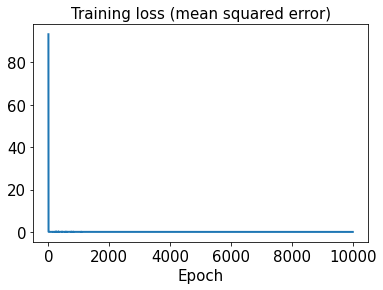

In [29]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

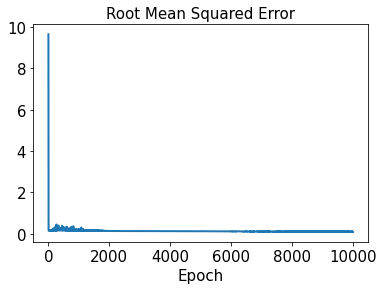

In [30]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [31]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [32]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [33]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

0.33101508


In [34]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.3671249


In [35]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [36]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

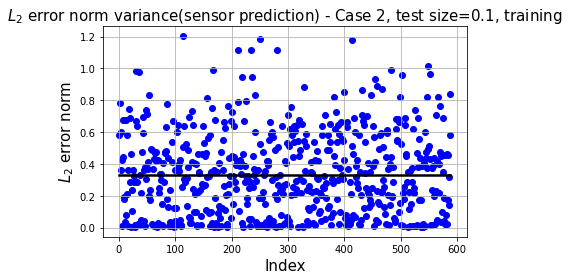

In [37]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

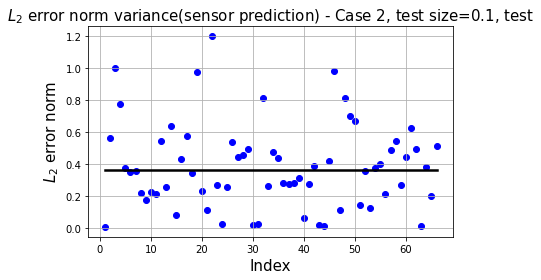

In [38]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [40]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [41]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [42]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.1034
Epoch 2/10000
19/19 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1018
Epoch 3/10000
19/19 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0960
Epoch 4/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0861
Epoch 5/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0840
Epoch 6/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0833
Epoch 7/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0819
Epoch 8/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0796
Epoch 9/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 10/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0769
Epoch 11/10000
19/19 [=======

19/19 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0384
Epoch 85/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0381
Epoch 86/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 87/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0375
Epoch 88/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 89/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 90/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0367
Epoch 91/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0365
Epoch 92/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0362
Epoch 93/10000
19/19 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0359
Epoch 94/10000
19/19 [=============

19/19 [==============================] - 0s 5ms/step - loss: 6.6398e-04 - rmse: 0.0223
Epoch 166/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5914e-04 - rmse: 0.0222
Epoch 167/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5294e-04 - rmse: 0.0220
Epoch 168/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4975e-04 - rmse: 0.0220
Epoch 169/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4300e-04 - rmse: 0.0218
Epoch 170/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3417e-04 - rmse: 0.0216
Epoch 171/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3222e-04 - rmse: 0.0216
Epoch 172/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3070e-04 - rmse: 0.0215
Epoch 173/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2177e-04 - rmse: 0.0213
Epoch 174/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1483e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 3.9653e-04 - rmse: 0.0152
Epoch 245/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9433e-04 - rmse: 0.0151
Epoch 246/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9319e-04 - rmse: 0.0151
Epoch 247/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9187e-04 - rmse: 0.0151
Epoch 248/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8988e-04 - rmse: 0.0150
Epoch 249/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8733e-04 - rmse: 0.0149
Epoch 250/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8455e-04 - rmse: 0.0148
Epoch 251/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8323e-04 - rmse: 0.0148
Epoch 252/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8324e-04 - rmse: 0.0148
Epoch 253/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8049e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 2.9487e-04 - rmse: 0.0116
Epoch 324/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.9427e-04 - rmse: 0.0116
Epoch 325/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.9245e-04 - rmse: 0.0115
Epoch 326/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.9195e-04 - rmse: 0.0115
Epoch 327/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.9087e-04 - rmse: 0.0115
Epoch 328/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.9026e-04 - rmse: 0.0114
Epoch 329/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.8991e-04 - rmse: 0.0114
Epoch 330/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.9042e-04 - rmse: 0.0115
Epoch 331/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.8814e-04 - rmse: 0.0114
Epoch 332/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.8655e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 2.4253e-04 - rmse: 0.0095
Epoch 403/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.4267e-04 - rmse: 0.0095
Epoch 404/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.4113e-04 - rmse: 0.0094
Epoch 405/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.4074e-04 - rmse: 0.0094
Epoch 406/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.3982e-04 - rmse: 0.0094
Epoch 407/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.3952e-04 - rmse: 0.0094
Epoch 408/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.3923e-04 - rmse: 0.0093
Epoch 409/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.3883e-04 - rmse: 0.0093
Epoch 410/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.3819e-04 - rmse: 0.0093
Epoch 411/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.3716e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 2.1047e-04 - rmse: 0.0081
Epoch 482/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.1013e-04 - rmse: 0.0081
Epoch 483/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0987e-04 - rmse: 0.0081
Epoch 484/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0848e-04 - rmse: 0.0080
Epoch 485/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0950e-04 - rmse: 0.0081
Epoch 486/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0782e-04 - rmse: 0.0080
Epoch 487/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0845e-04 - rmse: 0.0081
Epoch 488/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0872e-04 - rmse: 0.0081
Epoch 489/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0841e-04 - rmse: 0.0081
Epoch 490/10000
19/19 [==============================] - 0s 5ms/step - loss: 2.0773e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 1.8793e-04 - rmse: 0.0072
Epoch 561/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8735e-04 - rmse: 0.0072
Epoch 562/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8729e-04 - rmse: 0.0072
Epoch 563/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8764e-04 - rmse: 0.0072
Epoch 564/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8754e-04 - rmse: 0.0072
Epoch 565/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8784e-04 - rmse: 0.0072
Epoch 566/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8680e-04 - rmse: 0.0072
Epoch 567/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8872e-04 - rmse: 0.0073
Epoch 568/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8615e-04 - rmse: 0.0071
Epoch 569/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.8539e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 1.7158e-04 - rmse: 0.0066
Epoch 640/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.7133e-04 - rmse: 0.0066
Epoch 641/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.7099e-04 - rmse: 0.0066
Epoch 642/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.7041e-04 - rmse: 0.0065
Epoch 643/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.7053e-04 - rmse: 0.0065
Epoch 644/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.7007e-04 - rmse: 0.0065
Epoch 645/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.6995e-04 - rmse: 0.0065
Epoch 646/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.6980e-04 - rmse: 0.0065
Epoch 647/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.6978e-04 - rmse: 0.0065
Epoch 648/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.6943e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 1.5781e-04 - rmse: 0.0061
Epoch 719/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5729e-04 - rmse: 0.0061
Epoch 720/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5717e-04 - rmse: 0.0061
Epoch 721/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5684e-04 - rmse: 0.0060
Epoch 722/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5733e-04 - rmse: 0.0061
Epoch 723/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5736e-04 - rmse: 0.0061
Epoch 724/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5656e-04 - rmse: 0.0060
Epoch 725/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5592e-04 - rmse: 0.0060
Epoch 726/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5667e-04 - rmse: 0.0061
Epoch 727/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.5612e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 1.4606e-04 - rmse: 0.0057
Epoch 798/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4640e-04 - rmse: 0.0057
Epoch 799/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4592e-04 - rmse: 0.0057
Epoch 800/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4596e-04 - rmse: 0.0057
Epoch 801/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4630e-04 - rmse: 0.0057
Epoch 802/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4594e-04 - rmse: 0.0057
Epoch 803/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4536e-04 - rmse: 0.0057
Epoch 804/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4526e-04 - rmse: 0.0057
Epoch 805/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4524e-04 - rmse: 0.0057
Epoch 806/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.4560e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 1.3691e-04 - rmse: 0.0054
Epoch 877/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3743e-04 - rmse: 0.0055
Epoch 878/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3729e-04 - rmse: 0.0055
Epoch 879/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3699e-04 - rmse: 0.0054
Epoch 880/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3659e-04 - rmse: 0.0054
Epoch 881/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3607e-04 - rmse: 0.0054
Epoch 882/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3612e-04 - rmse: 0.0054
Epoch 883/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3635e-04 - rmse: 0.0054
Epoch 884/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3669e-04 - rmse: 0.0054
Epoch 885/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.3647e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 1.2933e-04 - rmse: 0.0052
Epoch 956/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2884e-04 - rmse: 0.0052
Epoch 957/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2836e-04 - rmse: 0.0051
Epoch 958/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2917e-04 - rmse: 0.0052
Epoch 959/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2897e-04 - rmse: 0.0052
Epoch 960/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2883e-04 - rmse: 0.0052
Epoch 961/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2779e-04 - rmse: 0.0051
Epoch 962/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2822e-04 - rmse: 0.0051
Epoch 963/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2774e-04 - rmse: 0.0051
Epoch 964/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2805e-04 -

19/19 [==============================] - 0s 5ms/step - loss: 1.2215e-04 - rmse: 0.0050
Epoch 1035/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2197e-04 - rmse: 0.0050
Epoch 1036/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2177e-04 - rmse: 0.0050
Epoch 1037/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2091e-04 - rmse: 0.0049
Epoch 1038/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2081e-04 - rmse: 0.0049
Epoch 1039/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2042e-04 - rmse: 0.0049
Epoch 1040/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2104e-04 - rmse: 0.0049
Epoch 1041/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2161e-04 - rmse: 0.0050
Epoch 1042/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2103e-04 - rmse: 0.0049
Epoch 1043/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.2

19/19 [==============================] - 0s 5ms/step - loss: 1.1493e-04 - rmse: 0.0047
Epoch 1113/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1489e-04 - rmse: 0.0047
Epoch 1114/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1542e-04 - rmse: 0.0048
Epoch 1115/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1606e-04 - rmse: 0.0049
Epoch 1116/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1473e-04 - rmse: 0.0047
Epoch 1117/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1461e-04 - rmse: 0.0047
Epoch 1118/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1477e-04 - rmse: 0.0047
Epoch 1119/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1453e-04 - rmse: 0.0047
Epoch 1120/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1482e-04 - rmse: 0.0048
Epoch 1121/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.1

19/19 [==============================] - 0s 5ms/step - loss: 1.0952e-04 - rmse: 0.0046
Epoch 1191/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0941e-04 - rmse: 0.0046
Epoch 1192/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0976e-04 - rmse: 0.0046
Epoch 1193/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0919e-04 - rmse: 0.0046
Epoch 1194/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0926e-04 - rmse: 0.0046
Epoch 1195/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0977e-04 - rmse: 0.0046
Epoch 1196/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0969e-04 - rmse: 0.0046
Epoch 1197/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0984e-04 - rmse: 0.0047
Epoch 1198/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0974e-04 - rmse: 0.0046
Epoch 1199/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0

19/19 [==============================] - 0s 5ms/step - loss: 1.0433e-04 - rmse: 0.0044
Epoch 1269/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0428e-04 - rmse: 0.0044
Epoch 1270/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0469e-04 - rmse: 0.0045
Epoch 1271/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0457e-04 - rmse: 0.0045
Epoch 1272/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0518e-04 - rmse: 0.0045
Epoch 1273/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0496e-04 - rmse: 0.0045
Epoch 1274/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0554e-04 - rmse: 0.0046
Epoch 1275/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0519e-04 - rmse: 0.0045
Epoch 1276/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0506e-04 - rmse: 0.0045
Epoch 1277/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0

19/19 [==============================] - 0s 5ms/step - loss: 1.0063e-04 - rmse: 0.0044
Epoch 1347/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0038e-04 - rmse: 0.0044
Epoch 1348/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0026e-04 - rmse: 0.0043
Epoch 1349/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0038e-04 - rmse: 0.0044
Epoch 1350/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0021e-04 - rmse: 0.0043
Epoch 1351/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0009e-04 - rmse: 0.0043
Epoch 1352/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0032e-04 - rmse: 0.0044
Epoch 1353/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0001e-04 - rmse: 0.0043
Epoch 1354/10000
19/19 [==============================] - 0s 5ms/step - loss: 1.0042e-04 - rmse: 0.0044
Epoch 1355/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.9

19/19 [==============================] - 0s 5ms/step - loss: 9.6843e-05 - rmse: 0.0043
Epoch 1425/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.6474e-05 - rmse: 0.0043
Epoch 1426/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.6941e-05 - rmse: 0.0043
Epoch 1427/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.6772e-05 - rmse: 0.0043
Epoch 1428/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.6446e-05 - rmse: 0.0043
Epoch 1429/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.6295e-05 - rmse: 0.0043
Epoch 1430/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.6013e-05 - rmse: 0.0042
Epoch 1431/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.6156e-05 - rmse: 0.0042
Epoch 1432/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.5987e-05 - rmse: 0.0042
Epoch 1433/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.5

19/19 [==============================] - 0s 5ms/step - loss: 9.3378e-05 - rmse: 0.0042
Epoch 1503/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.3028e-05 - rmse: 0.0042
Epoch 1504/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.2954e-05 - rmse: 0.0042
Epoch 1505/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.2691e-05 - rmse: 0.0041
Epoch 1506/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.3166e-05 - rmse: 0.0042
Epoch 1507/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.3227e-05 - rmse: 0.0042
Epoch 1508/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.3501e-05 - rmse: 0.0042
Epoch 1509/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.2883e-05 - rmse: 0.0042
Epoch 1510/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.2915e-05 - rmse: 0.0042
Epoch 1511/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.2

19/19 [==============================] - 0s 5ms/step - loss: 8.9705e-05 - rmse: 0.0041
Epoch 1581/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.0121e-05 - rmse: 0.0041
Epoch 1582/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.9189e-05 - rmse: 0.0040
Epoch 1583/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.9284e-05 - rmse: 0.0040
Epoch 1584/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.9983e-05 - rmse: 0.0041
Epoch 1585/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.0291e-05 - rmse: 0.0042
Epoch 1586/10000
19/19 [==============================] - 0s 5ms/step - loss: 9.0252e-05 - rmse: 0.0042
Epoch 1587/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.9835e-05 - rmse: 0.0041
Epoch 1588/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.9530e-05 - rmse: 0.0041
Epoch 1589/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.9

19/19 [==============================] - 0s 5ms/step - loss: 8.6523e-05 - rmse: 0.0040
Epoch 1659/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6424e-05 - rmse: 0.0040
Epoch 1660/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6393e-05 - rmse: 0.0040
Epoch 1661/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6334e-05 - rmse: 0.0039
Epoch 1662/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6144e-05 - rmse: 0.0039
Epoch 1663/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6590e-05 - rmse: 0.0040
Epoch 1664/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6541e-05 - rmse: 0.0040
Epoch 1665/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6673e-05 - rmse: 0.0040
Epoch 1666/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.6370e-05 - rmse: 0.0040
Epoch 1667/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.5

19/19 [==============================] - 0s 5ms/step - loss: 8.4078e-05 - rmse: 0.0039
Epoch 1737/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.5172e-05 - rmse: 0.0041
Epoch 1738/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.4560e-05 - rmse: 0.0040
Epoch 1739/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.3977e-05 - rmse: 0.0039
Epoch 1740/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.3898e-05 - rmse: 0.0039
Epoch 1741/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.3892e-05 - rmse: 0.0039
Epoch 1742/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.3805e-05 - rmse: 0.0039
Epoch 1743/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.3971e-05 - rmse: 0.0039
Epoch 1744/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.3784e-05 - rmse: 0.0039
Epoch 1745/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.3

19/19 [==============================] - 0s 5ms/step - loss: 8.2056e-05 - rmse: 0.0039
Epoch 1815/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.1525e-05 - rmse: 0.0039
Epoch 1816/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.1140e-05 - rmse: 0.0038
Epoch 1817/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.1197e-05 - rmse: 0.0038
Epoch 1818/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.1501e-05 - rmse: 0.0039
Epoch 1819/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.1776e-05 - rmse: 0.0039
Epoch 1820/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.1349e-05 - rmse: 0.0038
Epoch 1821/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.1112e-05 - rmse: 0.0038
Epoch 1822/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.2159e-05 - rmse: 0.0040
Epoch 1823/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.2

19/19 [==============================] - 0s 5ms/step - loss: 7.8937e-05 - rmse: 0.0037
Epoch 1893/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.0813e-05 - rmse: 0.0040
Epoch 1894/10000
19/19 [==============================] - 0s 5ms/step - loss: 8.0607e-05 - rmse: 0.0040
Epoch 1895/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.9747e-05 - rmse: 0.0039
Epoch 1896/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.9231e-05 - rmse: 0.0038
Epoch 1897/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.9024e-05 - rmse: 0.0038
Epoch 1898/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.9223e-05 - rmse: 0.0038
Epoch 1899/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.9026e-05 - rmse: 0.0038
Epoch 1900/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.8517e-05 - rmse: 0.0037
Epoch 1901/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.8

19/19 [==============================] - 0s 5ms/step - loss: 7.7011e-05 - rmse: 0.0037
Epoch 1971/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.6882e-05 - rmse: 0.0037
Epoch 1972/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.7328e-05 - rmse: 0.0038
Epoch 1973/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.6681e-05 - rmse: 0.0037
Epoch 1974/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.6553e-05 - rmse: 0.0037
Epoch 1975/10000
19/19 [==============================] - 0s 6ms/step - loss: 7.6720e-05 - rmse: 0.0037
Epoch 1976/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.6673e-05 - rmse: 0.0037
Epoch 1977/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.6943e-05 - rmse: 0.0037
Epoch 1978/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.6310e-05 - rmse: 0.0036
Epoch 1979/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.6

19/19 [==============================] - 0s 5ms/step - loss: 7.4362e-05 - rmse: 0.0036
Epoch 2049/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.4813e-05 - rmse: 0.0036
Epoch 2050/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.4898e-05 - rmse: 0.0036
Epoch 2051/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.4800e-05 - rmse: 0.0036
Epoch 2052/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.4499e-05 - rmse: 0.0036
Epoch 2053/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.4749e-05 - rmse: 0.0036
Epoch 2054/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.4670e-05 - rmse: 0.0036
Epoch 2055/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.5696e-05 - rmse: 0.0038
Epoch 2056/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.5659e-05 - rmse: 0.0038
Epoch 2057/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.5

19/19 [==============================] - 0s 5ms/step - loss: 7.3453e-05 - rmse: 0.0036
Epoch 2127/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3485e-05 - rmse: 0.0036
Epoch 2128/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3727e-05 - rmse: 0.0037
Epoch 2129/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3296e-05 - rmse: 0.0036
Epoch 2130/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3613e-05 - rmse: 0.0037
Epoch 2131/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3448e-05 - rmse: 0.0037
Epoch 2132/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3093e-05 - rmse: 0.0036
Epoch 2133/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3084e-05 - rmse: 0.0036
Epoch 2134/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.2810e-05 - rmse: 0.0036
Epoch 2135/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.3

19/19 [==============================] - 0s 5ms/step - loss: 7.1661e-05 - rmse: 0.0036
Epoch 2205/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.2085e-05 - rmse: 0.0036
Epoch 2206/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.2510e-05 - rmse: 0.0037
Epoch 2207/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.2471e-05 - rmse: 0.0037
Epoch 2208/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.1224e-05 - rmse: 0.0035
Epoch 2209/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.1445e-05 - rmse: 0.0036
Epoch 2210/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.1328e-05 - rmse: 0.0035
Epoch 2211/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.1121e-05 - rmse: 0.0035
Epoch 2212/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.1487e-05 - rmse: 0.0036
Epoch 2213/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.2

19/19 [==============================] - 0s 5ms/step - loss: 7.0381e-05 - rmse: 0.0036
Epoch 2283/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.0717e-05 - rmse: 0.0036
Epoch 2284/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9997e-05 - rmse: 0.0035
Epoch 2285/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9591e-05 - rmse: 0.0035
Epoch 2286/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9532e-05 - rmse: 0.0035
Epoch 2287/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9863e-05 - rmse: 0.0035
Epoch 2288/10000
19/19 [==============================] - 0s 6ms/step - loss: 6.9873e-05 - rmse: 0.0035
Epoch 2289/10000
19/19 [==============================] - 0s 5ms/step - loss: 7.0049e-05 - rmse: 0.0035
Epoch 2290/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9885e-05 - rmse: 0.0035
Epoch 2291/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9

19/19 [==============================] - 0s 5ms/step - loss: 6.9707e-05 - rmse: 0.0036
Epoch 2361/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9077e-05 - rmse: 0.0036
Epoch 2362/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.8949e-05 - rmse: 0.0035
Epoch 2363/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.9162e-05 - rmse: 0.0036
Epoch 2364/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.8544e-05 - rmse: 0.0035
Epoch 2365/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.8677e-05 - rmse: 0.0035
Epoch 2366/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.8184e-05 - rmse: 0.0034
Epoch 2367/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7752e-05 - rmse: 0.0034
Epoch 2368/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7992e-05 - rmse: 0.0034
Epoch 2369/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.8

19/19 [==============================] - 0s 5ms/step - loss: 6.7193e-05 - rmse: 0.0034
Epoch 2439/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7325e-05 - rmse: 0.0035
Epoch 2440/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7366e-05 - rmse: 0.0035
Epoch 2441/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.8785e-05 - rmse: 0.0037
Epoch 2442/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7934e-05 - rmse: 0.0036
Epoch 2443/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7337e-05 - rmse: 0.0035
Epoch 2444/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7277e-05 - rmse: 0.0035
Epoch 2445/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7434e-05 - rmse: 0.0035
Epoch 2446/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.8129e-05 - rmse: 0.0036
Epoch 2447/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7

19/19 [==============================] - 0s 5ms/step - loss: 6.5975e-05 - rmse: 0.0034
Epoch 2517/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7540e-05 - rmse: 0.0036
Epoch 2518/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.7192e-05 - rmse: 0.0036
Epoch 2519/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.6010e-05 - rmse: 0.0034
Epoch 2520/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.6317e-05 - rmse: 0.0035
Epoch 2521/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5683e-05 - rmse: 0.0034
Epoch 2522/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5393e-05 - rmse: 0.0033
Epoch 2523/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5786e-05 - rmse: 0.0034
Epoch 2524/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5816e-05 - rmse: 0.0034
Epoch 2525/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5

19/19 [==============================] - 0s 5ms/step - loss: 6.5036e-05 - rmse: 0.0034
Epoch 2595/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4588e-05 - rmse: 0.0034
Epoch 2596/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5094e-05 - rmse: 0.0034
Epoch 2597/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5117e-05 - rmse: 0.0034
Epoch 2598/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4594e-05 - rmse: 0.0034
Epoch 2599/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4498e-05 - rmse: 0.0033
Epoch 2600/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5053e-05 - rmse: 0.0034
Epoch 2601/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.5083e-05 - rmse: 0.0034
Epoch 2602/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4421e-05 - rmse: 0.0033
Epoch 2603/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4

19/19 [==============================] - 0s 5ms/step - loss: 6.3273e-05 - rmse: 0.0033
Epoch 2673/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3229e-05 - rmse: 0.0033
Epoch 2674/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3327e-05 - rmse: 0.0033
Epoch 2675/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3333e-05 - rmse: 0.0033
Epoch 2676/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.4282e-05 - rmse: 0.0034
Epoch 2677/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3526e-05 - rmse: 0.0033
Epoch 2678/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2893e-05 - rmse: 0.0032
Epoch 2679/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2951e-05 - rmse: 0.0033
Epoch 2680/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2947e-05 - rmse: 0.0033
Epoch 2681/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.3

19/19 [==============================] - 0s 5ms/step - loss: 6.2635e-05 - rmse: 0.0033
Epoch 2751/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2263e-05 - rmse: 0.0033
Epoch 2752/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1839e-05 - rmse: 0.0032
Epoch 2753/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1750e-05 - rmse: 0.0032
Epoch 2754/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2082e-05 - rmse: 0.0032
Epoch 2755/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2317e-05 - rmse: 0.0033
Epoch 2756/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2181e-05 - rmse: 0.0033
Epoch 2757/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2428e-05 - rmse: 0.0033
Epoch 2758/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1866e-05 - rmse: 0.0032
Epoch 2759/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2

19/19 [==============================] - 0s 5ms/step - loss: 6.1570e-05 - rmse: 0.0033
Epoch 2829/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1993e-05 - rmse: 0.0033
Epoch 2830/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.2134e-05 - rmse: 0.0034
Epoch 2831/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1791e-05 - rmse: 0.0033
Epoch 2832/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1526e-05 - rmse: 0.0033
Epoch 2833/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1304e-05 - rmse: 0.0032
Epoch 2834/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1839e-05 - rmse: 0.0033
Epoch 2835/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1507e-05 - rmse: 0.0033
Epoch 2836/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1513e-05 - rmse: 0.0033
Epoch 2837/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.1

19/19 [==============================] - 0s 5ms/step - loss: 6.0357e-05 - rmse: 0.0032
Epoch 2907/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.0216e-05 - rmse: 0.0032
Epoch 2908/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.0245e-05 - rmse: 0.0032
Epoch 2909/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.0039e-05 - rmse: 0.0032
Epoch 2910/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9654e-05 - rmse: 0.0031
Epoch 2911/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.0116e-05 - rmse: 0.0032
Epoch 2912/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.0387e-05 - rmse: 0.0032
Epoch 2913/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9719e-05 - rmse: 0.0031
Epoch 2914/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9953e-05 - rmse: 0.0032
Epoch 2915/10000
19/19 [==============================] - 0s 5ms/step - loss: 6.0

19/19 [==============================] - 0s 5ms/step - loss: 6.0666e-05 - rmse: 0.0034
Epoch 2985/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9667e-05 - rmse: 0.0032
Epoch 2986/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9719e-05 - rmse: 0.0032
Epoch 2987/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9438e-05 - rmse: 0.0032
Epoch 2988/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9132e-05 - rmse: 0.0031
Epoch 2989/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9175e-05 - rmse: 0.0031
Epoch 2990/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8999e-05 - rmse: 0.0031
Epoch 2991/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9569e-05 - rmse: 0.0032
Epoch 2992/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9541e-05 - rmse: 0.0032
Epoch 2993/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9

19/19 [==============================] - 0s 5ms/step - loss: 5.8445e-05 - rmse: 0.0031
Epoch 3063/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7986e-05 - rmse: 0.0031
Epoch 3064/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7982e-05 - rmse: 0.0031
Epoch 3065/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8645e-05 - rmse: 0.0032
Epoch 3066/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8584e-05 - rmse: 0.0032
Epoch 3067/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8994e-05 - rmse: 0.0032
Epoch 3068/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8683e-05 - rmse: 0.0032
Epoch 3069/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8973e-05 - rmse: 0.0032
Epoch 3070/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8936e-05 - rmse: 0.0032
Epoch 3071/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8

19/19 [==============================] - 0s 5ms/step - loss: 5.9046e-05 - rmse: 0.0033
Epoch 3141/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.9232e-05 - rmse: 0.0033
Epoch 3142/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8915e-05 - rmse: 0.0033
Epoch 3143/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7927e-05 - rmse: 0.0032
Epoch 3144/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7782e-05 - rmse: 0.0031
Epoch 3145/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7813e-05 - rmse: 0.0031
Epoch 3146/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7945e-05 - rmse: 0.0032
Epoch 3147/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.8039e-05 - rmse: 0.0032
Epoch 3148/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7694e-05 - rmse: 0.0031
Epoch 3149/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7

19/19 [==============================] - 0s 5ms/step - loss: 5.6949e-05 - rmse: 0.0031
Epoch 3219/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7298e-05 - rmse: 0.0031
Epoch 3220/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7634e-05 - rmse: 0.0032
Epoch 3221/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7758e-05 - rmse: 0.0032
Epoch 3222/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7986e-05 - rmse: 0.0033
Epoch 3223/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7109e-05 - rmse: 0.0031
Epoch 3224/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.6554e-05 - rmse: 0.0030
Epoch 3225/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.6967e-05 - rmse: 0.0031
Epoch 3226/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7014e-05 - rmse: 0.0031
Epoch 3227/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7

19/19 [==============================] - 0s 5ms/step - loss: 5.6353e-05 - rmse: 0.0031
Epoch 3297/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7268e-05 - rmse: 0.0032
Epoch 3298/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7244e-05 - rmse: 0.0032
Epoch 3299/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.7474e-05 - rmse: 0.0033
Epoch 3300/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.6954e-05 - rmse: 0.0032
Epoch 3301/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.6465e-05 - rmse: 0.0031
Epoch 3302/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5923e-05 - rmse: 0.0030
Epoch 3303/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5668e-05 - rmse: 0.0030
Epoch 3304/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5480e-05 - rmse: 0.0030
Epoch 3305/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5

19/19 [==============================] - 0s 5ms/step - loss: 5.5486e-05 - rmse: 0.0030
Epoch 3375/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5539e-05 - rmse: 0.0030
Epoch 3376/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5981e-05 - rmse: 0.0031
Epoch 3377/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.6773e-05 - rmse: 0.0032
Epoch 3378/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.6162e-05 - rmse: 0.0031
Epoch 3379/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5941e-05 - rmse: 0.0031
Epoch 3380/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5405e-05 - rmse: 0.0030
Epoch 3381/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5498e-05 - rmse: 0.0030
Epoch 3382/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5828e-05 - rmse: 0.0031
Epoch 3383/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5

19/19 [==============================] - 0s 5ms/step - loss: 5.5840e-05 - rmse: 0.0032
Epoch 3453/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5268e-05 - rmse: 0.0031
Epoch 3454/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.5524e-05 - rmse: 0.0031
Epoch 3455/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4942e-05 - rmse: 0.0030
Epoch 3456/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4728e-05 - rmse: 0.0030
Epoch 3457/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4756e-05 - rmse: 0.0030
Epoch 3458/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4336e-05 - rmse: 0.0029
Epoch 3459/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4377e-05 - rmse: 0.0029
Epoch 3460/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4709e-05 - rmse: 0.0030
Epoch 3461/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4

19/19 [==============================] - 0s 5ms/step - loss: 5.4720e-05 - rmse: 0.0031
Epoch 3531/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4256e-05 - rmse: 0.0030
Epoch 3532/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3865e-05 - rmse: 0.0029
Epoch 3533/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.4010e-05 - rmse: 0.0030
Epoch 3534/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3651e-05 - rmse: 0.0029
Epoch 3535/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3690e-05 - rmse: 0.0029
Epoch 3536/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3646e-05 - rmse: 0.0029
Epoch 3537/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3814e-05 - rmse: 0.0029
Epoch 3538/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3755e-05 - rmse: 0.0029
Epoch 3539/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3

19/19 [==============================] - 0s 5ms/step - loss: 5.3598e-05 - rmse: 0.0030
Epoch 3609/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3518e-05 - rmse: 0.0030
Epoch 3610/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3235e-05 - rmse: 0.0029
Epoch 3611/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3454e-05 - rmse: 0.0029
Epoch 3612/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3296e-05 - rmse: 0.0029
Epoch 3613/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3503e-05 - rmse: 0.0030
Epoch 3614/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3660e-05 - rmse: 0.0030
Epoch 3615/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3584e-05 - rmse: 0.0030
Epoch 3616/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3398e-05 - rmse: 0.0029
Epoch 3617/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3

19/19 [==============================] - 0s 5ms/step - loss: 5.2674e-05 - rmse: 0.0029
Epoch 3687/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2929e-05 - rmse: 0.0029
Epoch 3688/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2810e-05 - rmse: 0.0029
Epoch 3689/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2782e-05 - rmse: 0.0029
Epoch 3690/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2563e-05 - rmse: 0.0029
Epoch 3691/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2848e-05 - rmse: 0.0029
Epoch 3692/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2603e-05 - rmse: 0.0029
Epoch 3693/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2809e-05 - rmse: 0.0029
Epoch 3694/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3457e-05 - rmse: 0.0030
Epoch 3695/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3

19/19 [==============================] - 0s 5ms/step - loss: 5.2385e-05 - rmse: 0.0029
Epoch 3765/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2622e-05 - rmse: 0.0030
Epoch 3766/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3319e-05 - rmse: 0.0031
Epoch 3767/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3025e-05 - rmse: 0.0030
Epoch 3768/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2341e-05 - rmse: 0.0029
Epoch 3769/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2195e-05 - rmse: 0.0029
Epoch 3770/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2639e-05 - rmse: 0.0030
Epoch 3771/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2880e-05 - rmse: 0.0030
Epoch 3772/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2462e-05 - rmse: 0.0029
Epoch 3773/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3

19/19 [==============================] - 0s 5ms/step - loss: 5.1424e-05 - rmse: 0.0028
Epoch 3843/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2242e-05 - rmse: 0.0030
Epoch 3844/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3266e-05 - rmse: 0.0031
Epoch 3845/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3639e-05 - rmse: 0.0032
Epoch 3846/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2918e-05 - rmse: 0.0031
Epoch 3847/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2995e-05 - rmse: 0.0031
Epoch 3848/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.3235e-05 - rmse: 0.0031
Epoch 3849/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2156e-05 - rmse: 0.0030
Epoch 3850/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1820e-05 - rmse: 0.0029
Epoch 3851/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1

19/19 [==============================] - 0s 5ms/step - loss: 5.1661e-05 - rmse: 0.0029
Epoch 3921/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1305e-05 - rmse: 0.0029
Epoch 3922/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1069e-05 - rmse: 0.0028
Epoch 3923/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1339e-05 - rmse: 0.0029
Epoch 3924/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2301e-05 - rmse: 0.0030
Epoch 3925/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2817e-05 - rmse: 0.0031
Epoch 3926/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2282e-05 - rmse: 0.0030
Epoch 3927/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1522e-05 - rmse: 0.0029
Epoch 3928/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1416e-05 - rmse: 0.0029
Epoch 3929/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1

19/19 [==============================] - 0s 5ms/step - loss: 5.2907e-05 - rmse: 0.0032
Epoch 3999/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1951e-05 - rmse: 0.0030
Epoch 4000/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1378e-05 - rmse: 0.0029
Epoch 4001/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0784e-05 - rmse: 0.0028
Epoch 4002/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0779e-05 - rmse: 0.0028
Epoch 4003/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0788e-05 - rmse: 0.0028
Epoch 4004/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0522e-05 - rmse: 0.0028
Epoch 4005/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0389e-05 - rmse: 0.0028
Epoch 4006/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0310e-05 - rmse: 0.0028
Epoch 4007/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0

19/19 [==============================] - 0s 5ms/step - loss: 4.9994e-05 - rmse: 0.0028
Epoch 4077/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0033e-05 - rmse: 0.0028
Epoch 4078/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0477e-05 - rmse: 0.0029
Epoch 4079/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0423e-05 - rmse: 0.0028
Epoch 4080/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9910e-05 - rmse: 0.0028
Epoch 4081/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0461e-05 - rmse: 0.0029
Epoch 4082/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1066e-05 - rmse: 0.0030
Epoch 4083/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0889e-05 - rmse: 0.0029
Epoch 4084/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0443e-05 - rmse: 0.0029
Epoch 4085/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0

19/19 [==============================] - 0s 5ms/step - loss: 5.0379e-05 - rmse: 0.0029
Epoch 4155/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0448e-05 - rmse: 0.0029
Epoch 4156/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0244e-05 - rmse: 0.0029
Epoch 4157/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0286e-05 - rmse: 0.0029
Epoch 4158/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0096e-05 - rmse: 0.0029
Epoch 4159/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0074e-05 - rmse: 0.0028
Epoch 4160/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0298e-05 - rmse: 0.0029
Epoch 4161/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0425e-05 - rmse: 0.0029
Epoch 4162/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0264e-05 - rmse: 0.0029
Epoch 4163/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9

19/19 [==============================] - 0s 5ms/step - loss: 4.9334e-05 - rmse: 0.0028
Epoch 4233/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9420e-05 - rmse: 0.0028
Epoch 4234/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9134e-05 - rmse: 0.0027
Epoch 4235/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9058e-05 - rmse: 0.0027
Epoch 4236/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9568e-05 - rmse: 0.0028
Epoch 4237/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9474e-05 - rmse: 0.0028
Epoch 4238/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0964e-05 - rmse: 0.0031
Epoch 4239/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.1447e-05 - rmse: 0.0031
Epoch 4240/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.2034e-05 - rmse: 0.0032
Epoch 4241/10000
19/19 [==============================] - 0s 5ms/step - loss: 5.0

19/19 [==============================] - 0s 5ms/step - loss: 4.9876e-05 - rmse: 0.0029
Epoch 4311/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9659e-05 - rmse: 0.0029
Epoch 4312/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9777e-05 - rmse: 0.0029
Epoch 4313/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9488e-05 - rmse: 0.0029
Epoch 4314/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9252e-05 - rmse: 0.0028
Epoch 4315/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9458e-05 - rmse: 0.0029
Epoch 4316/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8925e-05 - rmse: 0.0028
Epoch 4317/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9078e-05 - rmse: 0.0028
Epoch 4318/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8818e-05 - rmse: 0.0027
Epoch 4319/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9

19/19 [==============================] - 0s 5ms/step - loss: 4.8331e-05 - rmse: 0.0027
Epoch 4389/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8223e-05 - rmse: 0.0027
Epoch 4390/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8259e-05 - rmse: 0.0027
Epoch 4391/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8383e-05 - rmse: 0.0027
Epoch 4392/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8496e-05 - rmse: 0.0027
Epoch 4393/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8680e-05 - rmse: 0.0028
Epoch 4394/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8688e-05 - rmse: 0.0028
Epoch 4395/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8410e-05 - rmse: 0.0027
Epoch 4396/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8252e-05 - rmse: 0.0027
Epoch 4397/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8

19/19 [==============================] - 0s 5ms/step - loss: 4.8109e-05 - rmse: 0.0027
Epoch 4467/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8231e-05 - rmse: 0.0027
Epoch 4468/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8634e-05 - rmse: 0.0028
Epoch 4469/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9262e-05 - rmse: 0.0029
Epoch 4470/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9269e-05 - rmse: 0.0029
Epoch 4471/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8352e-05 - rmse: 0.0028
Epoch 4472/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8167e-05 - rmse: 0.0027
Epoch 4473/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7994e-05 - rmse: 0.0027
Epoch 4474/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8932e-05 - rmse: 0.0029
Epoch 4475/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8

19/19 [==============================] - 0s 5ms/step - loss: 4.7640e-05 - rmse: 0.0027
Epoch 4545/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7768e-05 - rmse: 0.0027
Epoch 4546/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7762e-05 - rmse: 0.0027
Epoch 4547/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8487e-05 - rmse: 0.0028
Epoch 4548/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8394e-05 - rmse: 0.0028
Epoch 4549/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8415e-05 - rmse: 0.0028
Epoch 4550/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8275e-05 - rmse: 0.0028
Epoch 4551/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9717e-05 - rmse: 0.0031
Epoch 4552/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.9922e-05 - rmse: 0.0031
Epoch 4553/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8

19/19 [==============================] - 0s 5ms/step - loss: 4.8252e-05 - rmse: 0.0029
Epoch 4623/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7915e-05 - rmse: 0.0028
Epoch 4624/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7891e-05 - rmse: 0.0028
Epoch 4625/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7709e-05 - rmse: 0.0028
Epoch 4626/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7387e-05 - rmse: 0.0027
Epoch 4627/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7253e-05 - rmse: 0.0027
Epoch 4628/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7893e-05 - rmse: 0.0028
Epoch 4629/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.8016e-05 - rmse: 0.0028
Epoch 4630/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7445e-05 - rmse: 0.0027
Epoch 4631/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7

19/19 [==============================] - 0s 5ms/step - loss: 4.7254e-05 - rmse: 0.0027
Epoch 4701/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7034e-05 - rmse: 0.0027
Epoch 4702/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7157e-05 - rmse: 0.0027
Epoch 4703/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7196e-05 - rmse: 0.0027
Epoch 4704/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7535e-05 - rmse: 0.0028
Epoch 4705/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6843e-05 - rmse: 0.0026
Epoch 4706/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7076e-05 - rmse: 0.0027
Epoch 4707/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7266e-05 - rmse: 0.0027
Epoch 4708/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7251e-05 - rmse: 0.0027
Epoch 4709/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7

19/19 [==============================] - 0s 5ms/step - loss: 4.6989e-05 - rmse: 0.0027
Epoch 4779/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7335e-05 - rmse: 0.0028
Epoch 4780/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7341e-05 - rmse: 0.0028
Epoch 4781/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7134e-05 - rmse: 0.0028
Epoch 4782/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7378e-05 - rmse: 0.0028
Epoch 4783/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7082e-05 - rmse: 0.0027
Epoch 4784/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7091e-05 - rmse: 0.0027
Epoch 4785/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6844e-05 - rmse: 0.0027
Epoch 4786/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7215e-05 - rmse: 0.0028
Epoch 4787/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6

19/19 [==============================] - 0s 5ms/step - loss: 4.6112e-05 - rmse: 0.0026
Epoch 4857/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6138e-05 - rmse: 0.0026
Epoch 4858/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6645e-05 - rmse: 0.0027
Epoch 4859/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6652e-05 - rmse: 0.0027
Epoch 4860/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6820e-05 - rmse: 0.0027
Epoch 4861/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6922e-05 - rmse: 0.0028
Epoch 4862/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6440e-05 - rmse: 0.0027
Epoch 4863/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6311e-05 - rmse: 0.0026
Epoch 4864/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6307e-05 - rmse: 0.0026
Epoch 4865/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6

19/19 [==============================] - 0s 5ms/step - loss: 4.6617e-05 - rmse: 0.0027
Epoch 4935/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6491e-05 - rmse: 0.0027
Epoch 4936/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6557e-05 - rmse: 0.0027
Epoch 4937/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6120e-05 - rmse: 0.0027
Epoch 4938/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5760e-05 - rmse: 0.0026
Epoch 4939/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5660e-05 - rmse: 0.0026
Epoch 4940/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5783e-05 - rmse: 0.0026
Epoch 4941/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5890e-05 - rmse: 0.0026
Epoch 4942/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6110e-05 - rmse: 0.0027
Epoch 4943/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6

19/19 [==============================] - 0s 5ms/step - loss: 4.5493e-05 - rmse: 0.0026
Epoch 5013/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5418e-05 - rmse: 0.0026
Epoch 5014/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5373e-05 - rmse: 0.0026
Epoch 5015/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5352e-05 - rmse: 0.0026
Epoch 5016/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5665e-05 - rmse: 0.0026
Epoch 5017/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.7362e-05 - rmse: 0.0029
Epoch 5018/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6484e-05 - rmse: 0.0028
Epoch 5019/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6579e-05 - rmse: 0.0028
Epoch 5020/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6634e-05 - rmse: 0.0028
Epoch 5021/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6

19/19 [==============================] - 0s 5ms/step - loss: 4.5738e-05 - rmse: 0.0027
Epoch 5091/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5506e-05 - rmse: 0.0026
Epoch 5092/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5485e-05 - rmse: 0.0026
Epoch 5093/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5929e-05 - rmse: 0.0027
Epoch 5094/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5754e-05 - rmse: 0.0027
Epoch 5095/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5824e-05 - rmse: 0.0027
Epoch 5096/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5708e-05 - rmse: 0.0027
Epoch 5097/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5588e-05 - rmse: 0.0026
Epoch 5098/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5171e-05 - rmse: 0.0026
Epoch 5099/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5

19/19 [==============================] - 0s 5ms/step - loss: 4.4968e-05 - rmse: 0.0026
Epoch 5169/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5003e-05 - rmse: 0.0026
Epoch 5170/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4944e-05 - rmse: 0.0026
Epoch 5171/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4932e-05 - rmse: 0.0026
Epoch 5172/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4763e-05 - rmse: 0.0025
Epoch 5173/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4757e-05 - rmse: 0.0025
Epoch 5174/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5258e-05 - rmse: 0.0026
Epoch 5175/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5423e-05 - rmse: 0.0027
Epoch 5176/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4994e-05 - rmse: 0.0026
Epoch 5177/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5

19/19 [==============================] - 0s 5ms/step - loss: 4.7396e-05 - rmse: 0.0030
Epoch 5247/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6432e-05 - rmse: 0.0029
Epoch 5248/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5186e-05 - rmse: 0.0027
Epoch 5249/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5001e-05 - rmse: 0.0026
Epoch 5250/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4785e-05 - rmse: 0.0026
Epoch 5251/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4715e-05 - rmse: 0.0026
Epoch 5252/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4902e-05 - rmse: 0.0026
Epoch 5253/10000
19/19 [==============================] - 0s 6ms/step - loss: 4.4690e-05 - rmse: 0.0026
Epoch 5254/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4620e-05 - rmse: 0.0025
Epoch 5255/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5

19/19 [==============================] - 0s 5ms/step - loss: 4.4673e-05 - rmse: 0.0026
Epoch 5325/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4647e-05 - rmse: 0.0026
Epoch 5326/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4410e-05 - rmse: 0.0025
Epoch 5327/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4334e-05 - rmse: 0.0025
Epoch 5328/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4959e-05 - rmse: 0.0027
Epoch 5329/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6359e-05 - rmse: 0.0029
Epoch 5330/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.6150e-05 - rmse: 0.0029
Epoch 5331/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5417e-05 - rmse: 0.0027
Epoch 5332/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4784e-05 - rmse: 0.0026
Epoch 5333/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4

19/19 [==============================] - 0s 5ms/step - loss: 4.4461e-05 - rmse: 0.0026
Epoch 5403/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4452e-05 - rmse: 0.0026
Epoch 5404/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4782e-05 - rmse: 0.0027
Epoch 5405/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4463e-05 - rmse: 0.0026
Epoch 5406/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4226e-05 - rmse: 0.0026
Epoch 5407/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4272e-05 - rmse: 0.0026
Epoch 5408/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4633e-05 - rmse: 0.0026
Epoch 5409/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4561e-05 - rmse: 0.0026
Epoch 5410/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4364e-05 - rmse: 0.0026
Epoch 5411/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5

19/19 [==============================] - 0s 5ms/step - loss: 4.5069e-05 - rmse: 0.0027
Epoch 5481/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5274e-05 - rmse: 0.0028
Epoch 5482/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5084e-05 - rmse: 0.0027
Epoch 5483/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4520e-05 - rmse: 0.0026
Epoch 5484/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4101e-05 - rmse: 0.0026
Epoch 5485/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4150e-05 - rmse: 0.0026
Epoch 5486/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4247e-05 - rmse: 0.0026
Epoch 5487/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3882e-05 - rmse: 0.0025
Epoch 5488/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3779e-05 - rmse: 0.0025
Epoch 5489/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4

19/19 [==============================] - 0s 5ms/step - loss: 4.4222e-05 - rmse: 0.0026
Epoch 5559/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4044e-05 - rmse: 0.0026
Epoch 5560/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4150e-05 - rmse: 0.0026
Epoch 5561/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3860e-05 - rmse: 0.0026
Epoch 5562/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4051e-05 - rmse: 0.0026
Epoch 5563/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4484e-05 - rmse: 0.0027
Epoch 5564/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4112e-05 - rmse: 0.0026
Epoch 5565/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4281e-05 - rmse: 0.0026
Epoch 5566/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4694e-05 - rmse: 0.0027
Epoch 5567/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4

19/19 [==============================] - 0s 5ms/step - loss: 4.4086e-05 - rmse: 0.0026
Epoch 5637/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4549e-05 - rmse: 0.0027
Epoch 5638/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4149e-05 - rmse: 0.0026
Epoch 5639/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3581e-05 - rmse: 0.0025
Epoch 5640/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4030e-05 - rmse: 0.0026
Epoch 5641/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3650e-05 - rmse: 0.0026
Epoch 5642/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3758e-05 - rmse: 0.0026
Epoch 5643/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5473e-05 - rmse: 0.0029
Epoch 5644/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4410e-05 - rmse: 0.0027
Epoch 5645/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3

19/19 [==============================] - 0s 5ms/step - loss: 4.3517e-05 - rmse: 0.0026
Epoch 5715/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4223e-05 - rmse: 0.0027
Epoch 5716/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4300e-05 - rmse: 0.0027
Epoch 5717/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3979e-05 - rmse: 0.0027
Epoch 5718/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.5025e-05 - rmse: 0.0028
Epoch 5719/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4501e-05 - rmse: 0.0027
Epoch 5720/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3902e-05 - rmse: 0.0026
Epoch 5721/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3595e-05 - rmse: 0.0026
Epoch 5722/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3792e-05 - rmse: 0.0026
Epoch 5723/10000
19/19 [==============================] - 0s 6ms/step - loss: 4.3

19/19 [==============================] - 0s 5ms/step - loss: 4.3713e-05 - rmse: 0.0026
Epoch 5793/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4256e-05 - rmse: 0.0027
Epoch 5794/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3757e-05 - rmse: 0.0026
Epoch 5795/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3470e-05 - rmse: 0.0026
Epoch 5796/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3540e-05 - rmse: 0.0026
Epoch 5797/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3453e-05 - rmse: 0.0026
Epoch 5798/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3141e-05 - rmse: 0.0025
Epoch 5799/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3118e-05 - rmse: 0.0025
Epoch 5800/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3174e-05 - rmse: 0.0025
Epoch 5801/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3

19/19 [==============================] - 0s 5ms/step - loss: 4.2773e-05 - rmse: 0.0025
Epoch 5871/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2909e-05 - rmse: 0.0025
Epoch 5872/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2433e-05 - rmse: 0.0024
Epoch 5873/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2464e-05 - rmse: 0.0024
Epoch 5874/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2616e-05 - rmse: 0.0025
Epoch 5875/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3145e-05 - rmse: 0.0026
Epoch 5876/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3423e-05 - rmse: 0.0026
Epoch 5877/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3088e-05 - rmse: 0.0025
Epoch 5878/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2782e-05 - rmse: 0.0025
Epoch 5879/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2

19/19 [==============================] - 0s 5ms/step - loss: 4.2872e-05 - rmse: 0.0025
Epoch 5949/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2670e-05 - rmse: 0.0025
Epoch 5950/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2576e-05 - rmse: 0.0025
Epoch 5951/10000
19/19 [==============================] - 0s 6ms/step - loss: 4.2532e-05 - rmse: 0.0025
Epoch 5952/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2949e-05 - rmse: 0.0026
Epoch 5953/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2640e-05 - rmse: 0.0025
Epoch 5954/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2997e-05 - rmse: 0.0026
Epoch 5955/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2882e-05 - rmse: 0.0025
Epoch 5956/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2743e-05 - rmse: 0.0025
Epoch 5957/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2

19/19 [==============================] - 0s 5ms/step - loss: 4.2697e-05 - rmse: 0.0025
Epoch 6027/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3442e-05 - rmse: 0.0027
Epoch 6028/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4827e-05 - rmse: 0.0029
Epoch 6029/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4807e-05 - rmse: 0.0029
Epoch 6030/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3472e-05 - rmse: 0.0027
Epoch 6031/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2761e-05 - rmse: 0.0026
Epoch 6032/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2779e-05 - rmse: 0.0026
Epoch 6033/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2683e-05 - rmse: 0.0025
Epoch 6034/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2486e-05 - rmse: 0.0025
Epoch 6035/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2

19/19 [==============================] - 0s 5ms/step - loss: 4.2902e-05 - rmse: 0.0026
Epoch 6105/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2270e-05 - rmse: 0.0025
Epoch 6106/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2142e-05 - rmse: 0.0025
Epoch 6107/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2601e-05 - rmse: 0.0026
Epoch 6108/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2541e-05 - rmse: 0.0025
Epoch 6109/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2937e-05 - rmse: 0.0026
Epoch 6110/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2823e-05 - rmse: 0.0026
Epoch 6111/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3086e-05 - rmse: 0.0026
Epoch 6112/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2612e-05 - rmse: 0.0026
Epoch 6113/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2

19/19 [==============================] - 0s 5ms/step - loss: 4.2635e-05 - rmse: 0.0026
Epoch 6183/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2447e-05 - rmse: 0.0026
Epoch 6184/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2920e-05 - rmse: 0.0026
Epoch 6185/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3941e-05 - rmse: 0.0028
Epoch 6186/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3518e-05 - rmse: 0.0028
Epoch 6187/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3297e-05 - rmse: 0.0027
Epoch 6188/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3145e-05 - rmse: 0.0027
Epoch 6189/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2461e-05 - rmse: 0.0026
Epoch 6190/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3552e-05 - rmse: 0.0028
Epoch 6191/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.4

19/19 [==============================] - 0s 5ms/step - loss: 4.2317e-05 - rmse: 0.0026
Epoch 6261/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2248e-05 - rmse: 0.0025
Epoch 6262/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1788e-05 - rmse: 0.0025
Epoch 6263/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1800e-05 - rmse: 0.0025
Epoch 6264/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1865e-05 - rmse: 0.0025
Epoch 6265/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1902e-05 - rmse: 0.0025
Epoch 6266/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1850e-05 - rmse: 0.0025
Epoch 6267/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2097e-05 - rmse: 0.0025
Epoch 6268/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2328e-05 - rmse: 0.0026
Epoch 6269/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2

19/19 [==============================] - 0s 5ms/step - loss: 4.2292e-05 - rmse: 0.0026
Epoch 6339/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1859e-05 - rmse: 0.0025
Epoch 6340/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1419e-05 - rmse: 0.0024
Epoch 6341/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1340e-05 - rmse: 0.0024
Epoch 6342/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1483e-05 - rmse: 0.0024
Epoch 6343/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2030e-05 - rmse: 0.0025
Epoch 6344/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2593e-05 - rmse: 0.0026
Epoch 6345/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2128e-05 - rmse: 0.0026
Epoch 6346/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1754e-05 - rmse: 0.0025
Epoch 6347/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2

19/19 [==============================] - 0s 5ms/step - loss: 4.1478e-05 - rmse: 0.0025
Epoch 6417/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1546e-05 - rmse: 0.0025
Epoch 6418/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1096e-05 - rmse: 0.0024
Epoch 6419/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1442e-05 - rmse: 0.0024
Epoch 6420/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1415e-05 - rmse: 0.0024
Epoch 6421/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1825e-05 - rmse: 0.0025
Epoch 6422/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1574e-05 - rmse: 0.0025
Epoch 6423/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1502e-05 - rmse: 0.0025
Epoch 6424/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1788e-05 - rmse: 0.0025
Epoch 6425/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1

19/19 [==============================] - 0s 5ms/step - loss: 4.1672e-05 - rmse: 0.0025
Epoch 6495/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1065e-05 - rmse: 0.0024
Epoch 6496/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1304e-05 - rmse: 0.0024
Epoch 6497/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1273e-05 - rmse: 0.0024
Epoch 6498/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1684e-05 - rmse: 0.0025
Epoch 6499/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1460e-05 - rmse: 0.0025
Epoch 6500/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1312e-05 - rmse: 0.0024
Epoch 6501/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1534e-05 - rmse: 0.0025
Epoch 6502/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1609e-05 - rmse: 0.0025
Epoch 6503/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2

19/19 [==============================] - 0s 5ms/step - loss: 4.1403e-05 - rmse: 0.0025
Epoch 6573/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2077e-05 - rmse: 0.0026
Epoch 6574/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2573e-05 - rmse: 0.0027
Epoch 6575/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2534e-05 - rmse: 0.0027
Epoch 6576/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2949e-05 - rmse: 0.0028
Epoch 6577/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2568e-05 - rmse: 0.0027
Epoch 6578/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.3083e-05 - rmse: 0.0028
Epoch 6579/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2993e-05 - rmse: 0.0028
Epoch 6580/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.2228e-05 - rmse: 0.0027
Epoch 6581/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1

19/19 [==============================] - 0s 5ms/step - loss: 4.2085e-05 - rmse: 0.0027
Epoch 6651/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1313e-05 - rmse: 0.0025
Epoch 6652/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1248e-05 - rmse: 0.0025
Epoch 6653/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1249e-05 - rmse: 0.0025
Epoch 6654/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1279e-05 - rmse: 0.0025
Epoch 6655/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1055e-05 - rmse: 0.0025
Epoch 6656/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0763e-05 - rmse: 0.0024
Epoch 6657/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0523e-05 - rmse: 0.0023
Epoch 6658/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0753e-05 - rmse: 0.0024
Epoch 6659/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0

19/19 [==============================] - 0s 5ms/step - loss: 4.2112e-05 - rmse: 0.0027
Epoch 6729/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1979e-05 - rmse: 0.0027
Epoch 6730/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1851e-05 - rmse: 0.0026
Epoch 6731/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1266e-05 - rmse: 0.0025
Epoch 6732/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1309e-05 - rmse: 0.0025
Epoch 6733/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1162e-05 - rmse: 0.0025
Epoch 6734/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1047e-05 - rmse: 0.0025
Epoch 6735/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0848e-05 - rmse: 0.0024
Epoch 6736/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0812e-05 - rmse: 0.0024
Epoch 6737/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0

19/19 [==============================] - 0s 5ms/step - loss: 4.1473e-05 - rmse: 0.0026
Epoch 6807/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1296e-05 - rmse: 0.0026
Epoch 6808/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0878e-05 - rmse: 0.0025
Epoch 6809/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1351e-05 - rmse: 0.0026
Epoch 6810/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1223e-05 - rmse: 0.0025
Epoch 6811/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1246e-05 - rmse: 0.0025
Epoch 6812/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1076e-05 - rmse: 0.0025
Epoch 6813/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1311e-05 - rmse: 0.0026
Epoch 6814/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0833e-05 - rmse: 0.0025
Epoch 6815/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0

19/19 [==============================] - 0s 5ms/step - loss: 4.0504e-05 - rmse: 0.0024
Epoch 6885/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0828e-05 - rmse: 0.0025
Epoch 6886/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0656e-05 - rmse: 0.0025
Epoch 6887/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0559e-05 - rmse: 0.0024
Epoch 6888/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0884e-05 - rmse: 0.0025
Epoch 6889/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0421e-05 - rmse: 0.0024
Epoch 6890/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0717e-05 - rmse: 0.0025
Epoch 6891/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0878e-05 - rmse: 0.0025
Epoch 6892/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0663e-05 - rmse: 0.0025
Epoch 6893/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0

19/19 [==============================] - 0s 5ms/step - loss: 4.0170e-05 - rmse: 0.0024
Epoch 6963/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0366e-05 - rmse: 0.0024
Epoch 6964/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0700e-05 - rmse: 0.0025
Epoch 6965/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0874e-05 - rmse: 0.0025
Epoch 6966/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0514e-05 - rmse: 0.0024
Epoch 6967/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0459e-05 - rmse: 0.0024
Epoch 6968/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0251e-05 - rmse: 0.0024
Epoch 6969/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0713e-05 - rmse: 0.0025
Epoch 6970/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0532e-05 - rmse: 0.0025
Epoch 6971/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0

19/19 [==============================] - 0s 5ms/step - loss: 4.0476e-05 - rmse: 0.0025
Epoch 7041/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0706e-05 - rmse: 0.0025
Epoch 7042/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1413e-05 - rmse: 0.0027
Epoch 7043/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1403e-05 - rmse: 0.0026
Epoch 7044/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0466e-05 - rmse: 0.0025
Epoch 7045/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0511e-05 - rmse: 0.0025
Epoch 7046/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0568e-05 - rmse: 0.0025
Epoch 7047/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0604e-05 - rmse: 0.0025
Epoch 7048/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0614e-05 - rmse: 0.0025
Epoch 7049/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0

19/19 [==============================] - 0s 5ms/step - loss: 3.9882e-05 - rmse: 0.0024
Epoch 7119/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0101e-05 - rmse: 0.0024
Epoch 7120/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0223e-05 - rmse: 0.0024
Epoch 7121/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0031e-05 - rmse: 0.0024
Epoch 7122/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0212e-05 - rmse: 0.0024
Epoch 7123/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0229e-05 - rmse: 0.0024
Epoch 7124/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0145e-05 - rmse: 0.0024
Epoch 7125/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0176e-05 - rmse: 0.0024
Epoch 7126/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9759e-05 - rmse: 0.0023
Epoch 7127/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9

19/19 [==============================] - 0s 5ms/step - loss: 4.0208e-05 - rmse: 0.0025
Epoch 7197/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0062e-05 - rmse: 0.0024
Epoch 7198/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0105e-05 - rmse: 0.0024
Epoch 7199/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0671e-05 - rmse: 0.0026
Epoch 7200/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1133e-05 - rmse: 0.0026
Epoch 7201/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0960e-05 - rmse: 0.0026
Epoch 7202/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9836e-05 - rmse: 0.0024
Epoch 7203/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9792e-05 - rmse: 0.0024
Epoch 7204/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0532e-05 - rmse: 0.0025
Epoch 7205/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.1

19/19 [==============================] - 0s 5ms/step - loss: 3.9409e-05 - rmse: 0.0023
Epoch 7275/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9604e-05 - rmse: 0.0024
Epoch 7276/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0035e-05 - rmse: 0.0025
Epoch 7277/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9899e-05 - rmse: 0.0024
Epoch 7278/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9729e-05 - rmse: 0.0024
Epoch 7279/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9795e-05 - rmse: 0.0024
Epoch 7280/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0301e-05 - rmse: 0.0025
Epoch 7281/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0341e-05 - rmse: 0.0025
Epoch 7282/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0169e-05 - rmse: 0.0025
Epoch 7283/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9

19/19 [==============================] - 0s 5ms/step - loss: 4.0123e-05 - rmse: 0.0025
Epoch 7353/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0418e-05 - rmse: 0.0026
Epoch 7354/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0196e-05 - rmse: 0.0025
Epoch 7355/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0277e-05 - rmse: 0.0025
Epoch 7356/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0089e-05 - rmse: 0.0025
Epoch 7357/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9592e-05 - rmse: 0.0024
Epoch 7358/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9649e-05 - rmse: 0.0024
Epoch 7359/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9699e-05 - rmse: 0.0024
Epoch 7360/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9674e-05 - rmse: 0.0024
Epoch 7361/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9

19/19 [==============================] - 0s 5ms/step - loss: 3.9647e-05 - rmse: 0.0024
Epoch 7431/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9512e-05 - rmse: 0.0024
Epoch 7432/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0474e-05 - rmse: 0.0026
Epoch 7433/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0623e-05 - rmse: 0.0026
Epoch 7434/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0459e-05 - rmse: 0.0026
Epoch 7435/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0673e-05 - rmse: 0.0026
Epoch 7436/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0088e-05 - rmse: 0.0025
Epoch 7437/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9758e-05 - rmse: 0.0024
Epoch 7438/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9703e-05 - rmse: 0.0024
Epoch 7439/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9

19/19 [==============================] - 0s 5ms/step - loss: 3.8986e-05 - rmse: 0.0023
Epoch 7509/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9318e-05 - rmse: 0.0024
Epoch 7510/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9738e-05 - rmse: 0.0025
Epoch 7511/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8978e-05 - rmse: 0.0023
Epoch 7512/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9202e-05 - rmse: 0.0024
Epoch 7513/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8924e-05 - rmse: 0.0023
Epoch 7514/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9259e-05 - rmse: 0.0024
Epoch 7515/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9121e-05 - rmse: 0.0023
Epoch 7516/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9081e-05 - rmse: 0.0023
Epoch 7517/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9

19/19 [==============================] - 0s 5ms/step - loss: 3.9163e-05 - rmse: 0.0024
Epoch 7587/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9198e-05 - rmse: 0.0024
Epoch 7588/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9154e-05 - rmse: 0.0024
Epoch 7589/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9549e-05 - rmse: 0.0024
Epoch 7590/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9775e-05 - rmse: 0.0025
Epoch 7591/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9462e-05 - rmse: 0.0024
Epoch 7592/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9572e-05 - rmse: 0.0025
Epoch 7593/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9104e-05 - rmse: 0.0024
Epoch 7594/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8811e-05 - rmse: 0.0023
Epoch 7595/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.9672e-05 - rmse: 0.0025
Epoch 7665/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9565e-05 - rmse: 0.0025
Epoch 7666/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9934e-05 - rmse: 0.0025
Epoch 7667/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9365e-05 - rmse: 0.0024
Epoch 7668/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9080e-05 - rmse: 0.0024
Epoch 7669/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9825e-05 - rmse: 0.0025
Epoch 7670/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9856e-05 - rmse: 0.0025
Epoch 7671/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9719e-05 - rmse: 0.0025
Epoch 7672/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9672e-05 - rmse: 0.0025
Epoch 7673/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9

19/19 [==============================] - 0s 5ms/step - loss: 3.8999e-05 - rmse: 0.0024
Epoch 7743/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9244e-05 - rmse: 0.0024
Epoch 7744/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9348e-05 - rmse: 0.0025
Epoch 7745/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9221e-05 - rmse: 0.0024
Epoch 7746/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8727e-05 - rmse: 0.0023
Epoch 7747/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8735e-05 - rmse: 0.0023
Epoch 7748/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8740e-05 - rmse: 0.0023
Epoch 7749/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8925e-05 - rmse: 0.0024
Epoch 7750/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9241e-05 - rmse: 0.0024
Epoch 7751/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9

19/19 [==============================] - 0s 5ms/step - loss: 3.9245e-05 - rmse: 0.0024
Epoch 7821/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9127e-05 - rmse: 0.0024
Epoch 7822/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9180e-05 - rmse: 0.0024
Epoch 7823/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9029e-05 - rmse: 0.0024
Epoch 7824/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9149e-05 - rmse: 0.0024
Epoch 7825/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8982e-05 - rmse: 0.0024
Epoch 7826/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8925e-05 - rmse: 0.0024
Epoch 7827/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9456e-05 - rmse: 0.0025
Epoch 7828/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9442e-05 - rmse: 0.0025
Epoch 7829/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.9970e-05 - rmse: 0.0026
Epoch 7899/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0168e-05 - rmse: 0.0027
Epoch 7900/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8999e-05 - rmse: 0.0024
Epoch 7901/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9419e-05 - rmse: 0.0025
Epoch 7902/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8642e-05 - rmse: 0.0023
Epoch 7903/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8358e-05 - rmse: 0.0023
Epoch 7904/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8313e-05 - rmse: 0.0023
Epoch 7905/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8245e-05 - rmse: 0.0023
Epoch 7906/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8712e-05 - rmse: 0.0024
Epoch 7907/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 6ms/step - loss: 3.8615e-05 - rmse: 0.0024
Epoch 7977/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8279e-05 - rmse: 0.0023
Epoch 7978/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8141e-05 - rmse: 0.0023
Epoch 7979/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8279e-05 - rmse: 0.0023
Epoch 7980/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8715e-05 - rmse: 0.0024
Epoch 7981/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8693e-05 - rmse: 0.0024
Epoch 7982/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8182e-05 - rmse: 0.0023
Epoch 7983/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8230e-05 - rmse: 0.0023
Epoch 7984/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8665e-05 - rmse: 0.0024
Epoch 7985/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.8841e-05 - rmse: 0.0024
Epoch 8055/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7987e-05 - rmse: 0.0022
Epoch 8056/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8052e-05 - rmse: 0.0023
Epoch 8057/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8058e-05 - rmse: 0.0023
Epoch 8058/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8230e-05 - rmse: 0.0023
Epoch 8059/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8266e-05 - rmse: 0.0023
Epoch 8060/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8337e-05 - rmse: 0.0023
Epoch 8061/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8781e-05 - rmse: 0.0024
Epoch 8062/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8882e-05 - rmse: 0.0024
Epoch 8063/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.9206e-05 - rmse: 0.0025
Epoch 8133/10000
19/19 [==============================] - 0s 5ms/step - loss: 4.0065e-05 - rmse: 0.0027
Epoch 8134/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9158e-05 - rmse: 0.0025
Epoch 8135/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8776e-05 - rmse: 0.0024
Epoch 8136/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8949e-05 - rmse: 0.0025
Epoch 8137/10000
19/19 [==============================] - 0s 6ms/step - loss: 3.8418e-05 - rmse: 0.0024
Epoch 8138/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8340e-05 - rmse: 0.0023
Epoch 8139/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8176e-05 - rmse: 0.0023
Epoch 8140/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7963e-05 - rmse: 0.0023
Epoch 8141/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.8316e-05 - rmse: 0.0024
Epoch 8211/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8599e-05 - rmse: 0.0024
Epoch 8212/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8500e-05 - rmse: 0.0024
Epoch 8213/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8004e-05 - rmse: 0.0023
Epoch 8214/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7964e-05 - rmse: 0.0023
Epoch 8215/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8253e-05 - rmse: 0.0023
Epoch 8216/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7792e-05 - rmse: 0.0023
Epoch 8217/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7951e-05 - rmse: 0.0023
Epoch 8218/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8047e-05 - rmse: 0.0023
Epoch 8219/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.7658e-05 - rmse: 0.0022
Epoch 8289/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7711e-05 - rmse: 0.0023
Epoch 8290/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7663e-05 - rmse: 0.0022
Epoch 8291/10000
19/19 [==============================] - 0s 6ms/step - loss: 3.7589e-05 - rmse: 0.0022
Epoch 8292/10000
19/19 [==============================] - 0s 6ms/step - loss: 3.7659e-05 - rmse: 0.0022
Epoch 8293/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7703e-05 - rmse: 0.0023
Epoch 8294/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7767e-05 - rmse: 0.0023
Epoch 8295/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7884e-05 - rmse: 0.0023
Epoch 8296/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8443e-05 - rmse: 0.0024
Epoch 8297/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.7858e-05 - rmse: 0.0023
Epoch 8367/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8070e-05 - rmse: 0.0024
Epoch 8368/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8533e-05 - rmse: 0.0024
Epoch 8369/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9136e-05 - rmse: 0.0026
Epoch 8370/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8990e-05 - rmse: 0.0025
Epoch 8371/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.9094e-05 - rmse: 0.0026
Epoch 8372/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8273e-05 - rmse: 0.0024
Epoch 8373/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8392e-05 - rmse: 0.0024
Epoch 8374/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8663e-05 - rmse: 0.0025
Epoch 8375/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.7653e-05 - rmse: 0.0023
Epoch 8445/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8100e-05 - rmse: 0.0024
Epoch 8446/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7929e-05 - rmse: 0.0023
Epoch 8447/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8087e-05 - rmse: 0.0024
Epoch 8448/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8263e-05 - rmse: 0.0024
Epoch 8449/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7628e-05 - rmse: 0.0023
Epoch 8450/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7651e-05 - rmse: 0.0023
Epoch 8451/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8029e-05 - rmse: 0.0024
Epoch 8452/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8366e-05 - rmse: 0.0024
Epoch 8453/10000
19/19 [==============================] - 0s 6ms/step - loss: 3.8

19/19 [==============================] - 0s 5ms/step - loss: 3.7413e-05 - rmse: 0.0022
Epoch 8523/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7785e-05 - rmse: 0.0023
Epoch 8524/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7792e-05 - rmse: 0.0023
Epoch 8525/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7551e-05 - rmse: 0.0023
Epoch 8526/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7733e-05 - rmse: 0.0023
Epoch 8527/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7582e-05 - rmse: 0.0023
Epoch 8528/10000
19/19 [==============================] - 0s 6ms/step - loss: 3.7416e-05 - rmse: 0.0023
Epoch 8529/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7689e-05 - rmse: 0.0023
Epoch 8530/10000
19/19 [==============================] - 0s 6ms/step - loss: 3.7617e-05 - rmse: 0.0023
Epoch 8531/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.7182e-05 - rmse: 0.0022
Epoch 8601/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7494e-05 - rmse: 0.0023
Epoch 8602/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7269e-05 - rmse: 0.0022
Epoch 8603/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7479e-05 - rmse: 0.0023
Epoch 8604/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7810e-05 - rmse: 0.0024
Epoch 8605/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7693e-05 - rmse: 0.0023
Epoch 8606/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7588e-05 - rmse: 0.0023
Epoch 8607/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7546e-05 - rmse: 0.0023
Epoch 8608/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7383e-05 - rmse: 0.0023
Epoch 8609/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.7766e-05 - rmse: 0.0024
Epoch 8679/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7669e-05 - rmse: 0.0023
Epoch 8680/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7152e-05 - rmse: 0.0022
Epoch 8681/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7083e-05 - rmse: 0.0022
Epoch 8682/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7313e-05 - rmse: 0.0023
Epoch 8683/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7523e-05 - rmse: 0.0023
Epoch 8684/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7330e-05 - rmse: 0.0023
Epoch 8685/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7364e-05 - rmse: 0.0023
Epoch 8686/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7465e-05 - rmse: 0.0023
Epoch 8687/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.8381e-05 - rmse: 0.0025
Epoch 8757/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7823e-05 - rmse: 0.0024
Epoch 8758/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7593e-05 - rmse: 0.0023
Epoch 8759/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7446e-05 - rmse: 0.0023
Epoch 8760/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7829e-05 - rmse: 0.0024
Epoch 8761/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7561e-05 - rmse: 0.0023
Epoch 8762/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7314e-05 - rmse: 0.0023
Epoch 8763/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7433e-05 - rmse: 0.0023
Epoch 8764/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7089e-05 - rmse: 0.0022
Epoch 8765/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6

19/19 [==============================] - 0s 5ms/step - loss: 3.6824e-05 - rmse: 0.0022
Epoch 8835/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7103e-05 - rmse: 0.0023
Epoch 8836/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7222e-05 - rmse: 0.0023
Epoch 8837/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7809e-05 - rmse: 0.0024
Epoch 8838/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7868e-05 - rmse: 0.0024
Epoch 8839/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7166e-05 - rmse: 0.0023
Epoch 8840/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7160e-05 - rmse: 0.0023
Epoch 8841/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7334e-05 - rmse: 0.0023
Epoch 8842/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7482e-05 - rmse: 0.0023
Epoch 8843/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.7436e-05 - rmse: 0.0023
Epoch 8913/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7798e-05 - rmse: 0.0024
Epoch 8914/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7391e-05 - rmse: 0.0023
Epoch 8915/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7055e-05 - rmse: 0.0023
Epoch 8916/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7378e-05 - rmse: 0.0023
Epoch 8917/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7351e-05 - rmse: 0.0023
Epoch 8918/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7003e-05 - rmse: 0.0023
Epoch 8919/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6668e-05 - rmse: 0.0022
Epoch 8920/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6808e-05 - rmse: 0.0022
Epoch 8921/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.7332e-05 - rmse: 0.0023
Epoch 8991/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8081e-05 - rmse: 0.0025
Epoch 8992/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7811e-05 - rmse: 0.0024
Epoch 8993/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7488e-05 - rmse: 0.0024
Epoch 8994/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7559e-05 - rmse: 0.0024
Epoch 8995/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7432e-05 - rmse: 0.0024
Epoch 8996/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7109e-05 - rmse: 0.0023
Epoch 8997/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7480e-05 - rmse: 0.0024
Epoch 8998/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7963e-05 - rmse: 0.0025
Epoch 8999/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.6563e-05 - rmse: 0.0022
Epoch 9069/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7063e-05 - rmse: 0.0023
Epoch 9070/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7040e-05 - rmse: 0.0023
Epoch 9071/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7059e-05 - rmse: 0.0023
Epoch 9072/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6737e-05 - rmse: 0.0022
Epoch 9073/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6669e-05 - rmse: 0.0022
Epoch 9074/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7072e-05 - rmse: 0.0023
Epoch 9075/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7052e-05 - rmse: 0.0023
Epoch 9076/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7223e-05 - rmse: 0.0023
Epoch 9077/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.6718e-05 - rmse: 0.0022
Epoch 9147/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6718e-05 - rmse: 0.0022
Epoch 9148/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6877e-05 - rmse: 0.0023
Epoch 9149/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6905e-05 - rmse: 0.0023
Epoch 9150/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6868e-05 - rmse: 0.0023
Epoch 9151/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6710e-05 - rmse: 0.0022
Epoch 9152/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6895e-05 - rmse: 0.0023
Epoch 9153/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6824e-05 - rmse: 0.0023
Epoch 9154/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7279e-05 - rmse: 0.0024
Epoch 9155/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.6881e-05 - rmse: 0.0023
Epoch 9225/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7146e-05 - rmse: 0.0024
Epoch 9226/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7375e-05 - rmse: 0.0024
Epoch 9227/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6994e-05 - rmse: 0.0023
Epoch 9228/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6528e-05 - rmse: 0.0022
Epoch 9229/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6615e-05 - rmse: 0.0022
Epoch 9230/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6565e-05 - rmse: 0.0022
Epoch 9231/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7018e-05 - rmse: 0.0023
Epoch 9232/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.8217e-05 - rmse: 0.0026
Epoch 9233/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.6656e-05 - rmse: 0.0023
Epoch 9303/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6255e-05 - rmse: 0.0022
Epoch 9304/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6534e-05 - rmse: 0.0022
Epoch 9305/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6303e-05 - rmse: 0.0022
Epoch 9306/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6502e-05 - rmse: 0.0022
Epoch 9307/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7258e-05 - rmse: 0.0024
Epoch 9308/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7043e-05 - rmse: 0.0024
Epoch 9309/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6964e-05 - rmse: 0.0023
Epoch 9310/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6927e-05 - rmse: 0.0023
Epoch 9311/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7

19/19 [==============================] - 0s 5ms/step - loss: 3.6562e-05 - rmse: 0.0023
Epoch 9381/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6376e-05 - rmse: 0.0022
Epoch 9382/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6345e-05 - rmse: 0.0022
Epoch 9383/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6488e-05 - rmse: 0.0022
Epoch 9384/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6294e-05 - rmse: 0.0022
Epoch 9385/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6256e-05 - rmse: 0.0022
Epoch 9386/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6417e-05 - rmse: 0.0022
Epoch 9387/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6739e-05 - rmse: 0.0023
Epoch 9388/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6813e-05 - rmse: 0.0023
Epoch 9389/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6

19/19 [==============================] - 0s 5ms/step - loss: 3.6958e-05 - rmse: 0.0024
Epoch 9459/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7465e-05 - rmse: 0.0025
Epoch 9460/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6971e-05 - rmse: 0.0024
Epoch 9461/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6707e-05 - rmse: 0.0023
Epoch 9462/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6622e-05 - rmse: 0.0023
Epoch 9463/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6921e-05 - rmse: 0.0024
Epoch 9464/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6817e-05 - rmse: 0.0023
Epoch 9465/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6725e-05 - rmse: 0.0023
Epoch 9466/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6388e-05 - rmse: 0.0022
Epoch 9467/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6

19/19 [==============================] - 0s 5ms/step - loss: 3.5936e-05 - rmse: 0.0022
Epoch 9537/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6007e-05 - rmse: 0.0022
Epoch 9538/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6027e-05 - rmse: 0.0022
Epoch 9539/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6417e-05 - rmse: 0.0023
Epoch 9540/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6319e-05 - rmse: 0.0022
Epoch 9541/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6528e-05 - rmse: 0.0023
Epoch 9542/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6613e-05 - rmse: 0.0023
Epoch 9543/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6379e-05 - rmse: 0.0023
Epoch 9544/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6064e-05 - rmse: 0.0022
Epoch 9545/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6

19/19 [==============================] - 0s 5ms/step - loss: 3.6460e-05 - rmse: 0.0023
Epoch 9615/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6448e-05 - rmse: 0.0023
Epoch 9616/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6703e-05 - rmse: 0.0023
Epoch 9617/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7679e-05 - rmse: 0.0025
Epoch 9618/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.7583e-05 - rmse: 0.0025
Epoch 9619/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6553e-05 - rmse: 0.0023
Epoch 9620/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6151e-05 - rmse: 0.0022
Epoch 9621/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6304e-05 - rmse: 0.0023
Epoch 9622/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6340e-05 - rmse: 0.0023
Epoch 9623/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6

19/19 [==============================] - 0s 5ms/step - loss: 3.6181e-05 - rmse: 0.0022
Epoch 9693/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6458e-05 - rmse: 0.0023
Epoch 9694/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6727e-05 - rmse: 0.0024
Epoch 9695/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6860e-05 - rmse: 0.0024
Epoch 9696/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6705e-05 - rmse: 0.0024
Epoch 9697/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6313e-05 - rmse: 0.0023
Epoch 9698/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6070e-05 - rmse: 0.0022
Epoch 9699/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6135e-05 - rmse: 0.0022
Epoch 9700/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5781e-05 - rmse: 0.0022
Epoch 9701/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6

19/19 [==============================] - 0s 5ms/step - loss: 3.5534e-05 - rmse: 0.0021
Epoch 9771/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5930e-05 - rmse: 0.0022
Epoch 9772/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5889e-05 - rmse: 0.0022
Epoch 9773/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5835e-05 - rmse: 0.0022
Epoch 9774/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5894e-05 - rmse: 0.0022
Epoch 9775/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5872e-05 - rmse: 0.0022
Epoch 9776/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6162e-05 - rmse: 0.0023
Epoch 9777/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5923e-05 - rmse: 0.0022
Epoch 9778/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5892e-05 - rmse: 0.0022
Epoch 9779/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5

19/19 [==============================] - 0s 5ms/step - loss: 3.7123e-05 - rmse: 0.0025
Epoch 9849/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6538e-05 - rmse: 0.0024
Epoch 9850/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5865e-05 - rmse: 0.0022
Epoch 9851/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5907e-05 - rmse: 0.0022
Epoch 9852/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6506e-05 - rmse: 0.0023
Epoch 9853/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6970e-05 - rmse: 0.0024
Epoch 9854/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6302e-05 - rmse: 0.0023
Epoch 9855/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5783e-05 - rmse: 0.0022
Epoch 9856/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6040e-05 - rmse: 0.0022
Epoch 9857/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5

19/19 [==============================] - 0s 5ms/step - loss: 3.5738e-05 - rmse: 0.0022
Epoch 9927/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5728e-05 - rmse: 0.0022
Epoch 9928/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6204e-05 - rmse: 0.0023
Epoch 9929/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6406e-05 - rmse: 0.0023
Epoch 9930/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.6149e-05 - rmse: 0.0023
Epoch 9931/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5820e-05 - rmse: 0.0022
Epoch 9932/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5671e-05 - rmse: 0.0022
Epoch 9933/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5807e-05 - rmse: 0.0022
Epoch 9934/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5903e-05 - rmse: 0.0022
Epoch 9935/10000
19/19 [==============================] - 0s 5ms/step - loss: 3.5

In [43]:
time = end - start
print("Training time:", time)

Training time: 0:16:14.724033


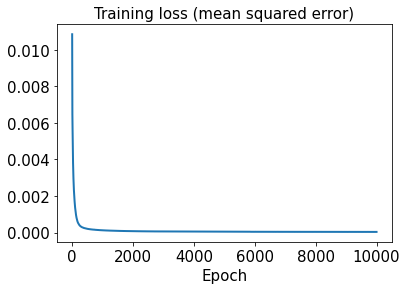

In [44]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

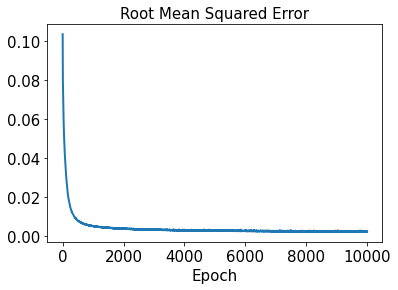

In [45]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [46]:
test_results = sd.evaluate(x_train)

19/19 [==============================] - 0s 1ms/step - loss: 3.0852e-05 - rmse: 0.0000e+00


In [47]:
decoded_train = sd.predict(decoded_sensor_train)

In [48]:
decoded_test = sd.predict(decoded_sensor_test)

In [49]:
error_train_abs = np.abs(decoded_train - y_train)

In [50]:
error_test_abs = np.abs(decoded_test - y_test)

In [51]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.35703143


In [52]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.40809864


In [53]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.3725065, 0.87684184, 0.29337335, 0.4647293, 0.01853405, 0.678701, 0.656461, 0.17313214, 0.30738053, 0.19887637, 0.048818085, 0.848879, 0.09106582, 0.83721435, 0.35119724, 0.018072058, 0.20977226, 0.5923331, 0.3769312, 0.3932748, 0.009881348, 0.67478764, 0.33488366, 0.15326126, 0.15886319, 0.40741768, 0.4253556, 0.0069787866, 0.04512791, 0.17082822, 0.40022573, 0.31189167, 0.28094795, 0.016051184, 0.013492399, 0.5264908, 0.031790543, 0.37024197, 0.1801616, 0.07405152, 0.54911256, 0.3500883, 0.6177477, 0.57421064, 0.046750754, 0.43475997, 0.007781424, 0.70901465, 0.16351783, 0.6719932, 0.27732697, 0.4737732, 0.36925536, 0.59155935, 0.20011947, 0.18723983, 0.38017797, 0.097312465, 0.053212423, 0.019031426, 0.5411414, 0.44853392, 0.010067086, 0.5965185, 0.5145807, 0.7112334, 0.018964766, 0.0071470677, 0.16124475, 0.056797586, 0.46905252, 0.31856984, 0.541225, 0.18962313, 0.48986638, 0.035264425, 0.031606063, 0.34888914, 0.027989097, 0.29503253, 0.43604353, 0.32964763, 0.6018551, 0.56383

In [54]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.031580254, 0.27468008, 0.8240219, 0.88452905, 0.38188592, 0.27506837, 0.32673115, 0.269389, 0.21048556, 0.35075372, 0.97878486, 0.47413802, 0.18684958, 0.52594984, 0.102565184, 0.32885364, 0.42976573, 0.27858743, 0.59977466, 0.22266221, 0.097602636, 0.90674204, 0.50600874, 0.05973216, 0.6309002, 0.6008519, 0.5848393, 0.25270477, 0.39647785, 0.04265918, 0.047643356, 0.7272152, 0.62482053, 0.57140434, 0.18534987, 0.721469, 0.25948593, 0.6777342, 0.78376836, 0.10312364, 0.5547251, 0.5661623, 0.012896736, 0.012213506, 0.39589524, 0.860221, 0.06576046, 0.53492135, 0.8815188, 0.2799788, 0.24815892, 0.2259516, 0.1343424, 0.76405954, 0.52108794, 0.14643694, 0.43750948, 0.6489634, 0.49088195, 0.5526671, 0.19512457, 0.42692763, 0.03465076, 0.49218914, 0.2718156, 0.45037302]


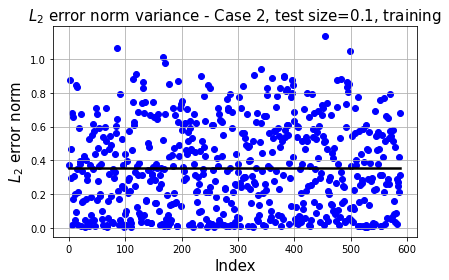

In [55]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

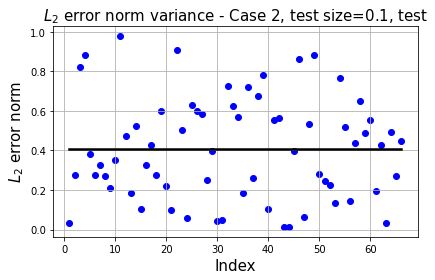

In [56]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

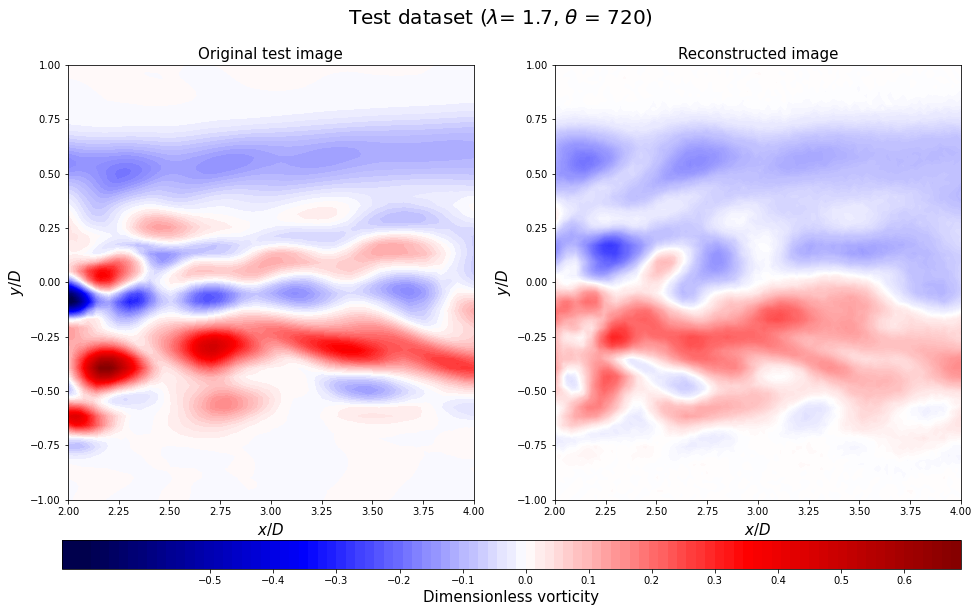

In [57]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

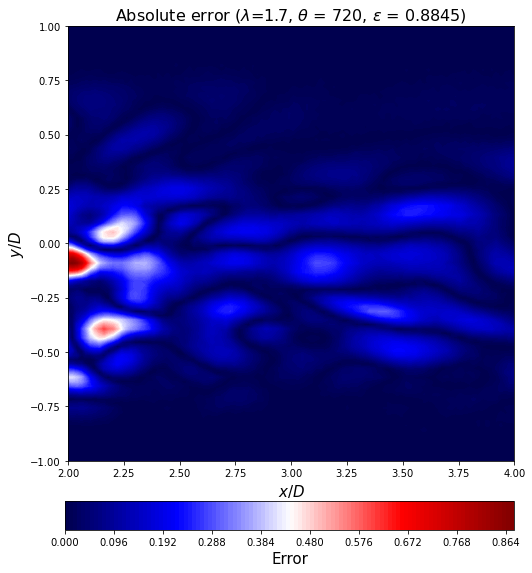

In [58]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()